# Honeypot Cybersecurity Data 
 #### February 12,2023

#### The purpose of this EDA notebook is to explore cybersecurity data collected from Vikrant Honeypot Data for February 12, 2023. The analysis focuses on understanding the dataset, identifying patterns, correlations, and preparing the data for further analysis or modeling.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geoip2.database

In [44]:
Feb5 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-05.csv')
Feb6 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-06.csv')
Feb7 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-07.csv')
Feb8 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-08.csv')
Feb9 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-09.csv')
Feb10 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-10.csv')
Feb11 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-11.csv')
Feb12 = pd.read_csv('/Users/sa3/Downloads/archive/csv-daily-data-20230612T101401Z-001/csv-daily-data/2023-02-12.csv')

In [45]:
Feb12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76303 entries, 0 to 76302
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     76303 non-null  object 
 1   Src IP                      76303 non-null  object 
 2   Src Port                    76303 non-null  int64  
 3   Dst IP                      76303 non-null  object 
 4   Dst Port                    76303 non-null  int64  
 5   Protocol                    76303 non-null  int64  
 6   Timestamp                   76303 non-null  object 
 7   Flow Duration               76303 non-null  int64  
 8   Total Fwd Packet            76303 non-null  int64  
 9   Total Bwd packets           76303 non-null  int64  
 10  Total Length of Fwd Packet  76303 non-null  float64
 11  Total Length of Bwd Packet  76303 non-null  float64
 12  Fwd Packet Length Max       76303 non-null  float64
 13  Fwd Packet Length Min       763

In [46]:
Feb12.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,103.82.22.31-10.1.0.4-60519-5555-6,103.82.22.31,60519,10.1.0.4,5555,6,2023-02-12 00:00:01,1274320,2,2,...,20,0.0,0.0,0.0,0.0,1.676160e+15,0.000000e+00,1.676160e+15,1.676160e+15,adbhoney
1,38.60.47.125-10.1.0.4-12043-123-17,38.60.47.125,12043,10.1.0.4,123,17,2023-02-12 00:00:03,63952797,1410,20,...,8,0.0,0.0,0.0,0.0,1.676160e+15,0.000000e+00,1.676160e+15,1.676160e+15,ddospot
2,23.225.116.10-10.1.0.4-42806-123-17,23.225.116.10,42806,10.1.0.4,123,17,2023-02-12 00:00:06,55956907,9,0,...,8,4466157.0,0.0,4466157.0,4466157.0,2.095200e+14,5.926121e+14,1.676160e+15,5.307760e+06,ddospot
3,23.225.116.10-10.1.0.4-36329-123-17,23.225.116.10,36329,10.1.0.4,123,17,2023-02-12 00:00:06,51896382,8,0,...,8,4591215.0,0.0,4591215.0,4591215.0,2.394514e+14,6.335289e+14,1.676160e+15,5.296391e+06,ddospot
4,23.225.116.10-10.1.0.4-26471-123-17,23.225.116.10,26471,10.1.0.4,123,17,2023-02-12 00:00:06,51183146,9,0,...,8,8774430.0,0.0,8774430.0,8774430.0,2.394514e+14,6.335289e+14,1.676160e+15,5.186569e+06,ddospot


In [47]:
Feb12.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,76303.000000,76303.000000,76303.000000,7.630300e+04,76303.000000,76303.000000,76303.000000,7.630300e+04,76303.000000,76303.000000,...,76303.000000,76303.000000,7.630300e+04,7.630300e+04,7.630300e+04,7.630300e+04,7.630300e+04,7.630300e+04,7.630300e+04,7.630300e+04
mean,33052.752146,618.249545,16.420613,2.633108e+07,201.740508,1.127964,1660.640407,3.473904e+02,30.593266,21.692882,...,200.647878,9.001009,2.956109e+06,9.156033e+05,3.786017e+06,2.261264e+06,1.353433e+15,2.762464e+14,1.676197e+15,1.188979e+15
std,19055.528165,4601.670961,2.457163,3.703047e+07,691.467171,12.456714,6829.640832,1.681182e+04,83.779482,22.376337,...,691.490366,4.453928,1.122288e+07,4.895714e+06,1.354739e+07,1.025446e+07,5.198852e+14,4.464832e+14,2.243463e+10,7.611197e+14
min,1.000000,19.000000,6.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.822238e+13,0.000000e+00,1.676160e+15,5.000054e+06
25%,16414.500000,123.000000,17.000000,5.160000e+02,1.000000,0.000000,48.000000,0.000000e+00,8.000000,8.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.380998e+14,0.000000e+00,1.676178e+15,1.528216e+07
50%,33778.000000,123.000000,17.000000,9.863739e+06,3.000000,0.000000,48.000000,0.000000e+00,8.000000,8.000000,...,2.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.676183e+15,0.000000e+00,1.676192e+15,1.676183e+15
75%,49539.500000,123.000000,17.000000,3.959182e+07,60.000000,1.000000,496.000000,4.800000e+01,48.000000,48.000000,...,59.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.676209e+15,6.842934e+14,1.676212e+15,1.676209e+15
max,65535.000000,65363.000000,17.000000,1.200000e+08,13028.000000,2631.000000,785452.000000,3.738491e+06,1460.000000,1336.000000,...,13027.000000,40.000000,1.142716e+08,7.301791e+07,1.142716e+08,1.142716e+08,1.676244e+15,1.185282e+15,1.676244e+15,1.676244e+15


In [48]:
reader = geoip2.database.Reader('/Users/sa3/Desktop/TKH Cybersecurity Capstone /The-CyberChase/GeoLite2-City_20250610/GeoLite2-City.mmdb')

locations = []

for ip in Feb12['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations.append(location_str)

# Add to DataFrame
Feb12['Location'] = locations
Feb12

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Location
0,103.82.22.31-10.1.0.4-60519-5555-6,103.82.22.31,60519,10.1.0.4,5555,6,2023-02-12 00:00:01,1274320,2,2,...,0.0,0.0,0.0,0.0,1.676160e+15,0.000000e+00,1.676160e+15,1.676160e+15,adbhoney,Vietnam
1,38.60.47.125-10.1.0.4-12043-123-17,38.60.47.125,12043,10.1.0.4,123,17,2023-02-12 00:00:03,63952797,1410,20,...,0.0,0.0,0.0,0.0,1.676160e+15,0.000000e+00,1.676160e+15,1.676160e+15,ddospot,United States
2,23.225.116.10-10.1.0.4-42806-123-17,23.225.116.10,42806,10.1.0.4,123,17,2023-02-12 00:00:06,55956907,9,0,...,4466157.0,0.0,4466157.0,4466157.0,2.095200e+14,5.926121e+14,1.676160e+15,5.307760e+06,ddospot,United States
3,23.225.116.10-10.1.0.4-36329-123-17,23.225.116.10,36329,10.1.0.4,123,17,2023-02-12 00:00:06,51896382,8,0,...,4591215.0,0.0,4591215.0,4591215.0,2.394514e+14,6.335289e+14,1.676160e+15,5.296391e+06,ddospot,United States
4,23.225.116.10-10.1.0.4-26471-123-17,23.225.116.10,26471,10.1.0.4,123,17,2023-02-12 00:00:06,51183146,9,0,...,8774430.0,0.0,8774430.0,8774430.0,2.394514e+14,6.335289e+14,1.676160e+15,5.186569e+06,ddospot,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76298,103.162.29.237-10.1.0.4-39559-123-17,103.162.29.237,39559,10.1.0.4,123,17,2023-02-12 23:21:05,37706964,1287,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam
76299,103.178.228.84-10.1.0.4-26582-123-17,103.178.228.84,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37414115,2755,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam
76300,103.178.228.60-10.1.0.4-26582-123-17,103.178.228.60,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37307247,1234,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam
76301,103.178.228.112-10.1.0.4-26582-123-17,103.178.228.112,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37461163,1243,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam


In [49]:
reader = geoip2.database.Reader('/Users/sa3/Desktop/TKH Cybersecurity Capstone /The-CyberChase/GeoLite2-Country_20250610/GeoLite2-Country.mmdb')

locations_2 = []

for ip in Feb12['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations_2.append(location_str)

# Add to DataFrame
Feb12['Location'] = locations
Feb12

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Location
0,103.82.22.31-10.1.0.4-60519-5555-6,103.82.22.31,60519,10.1.0.4,5555,6,2023-02-12 00:00:01,1274320,2,2,...,0.0,0.0,0.0,0.0,1.676160e+15,0.000000e+00,1.676160e+15,1.676160e+15,adbhoney,Vietnam
1,38.60.47.125-10.1.0.4-12043-123-17,38.60.47.125,12043,10.1.0.4,123,17,2023-02-12 00:00:03,63952797,1410,20,...,0.0,0.0,0.0,0.0,1.676160e+15,0.000000e+00,1.676160e+15,1.676160e+15,ddospot,United States
2,23.225.116.10-10.1.0.4-42806-123-17,23.225.116.10,42806,10.1.0.4,123,17,2023-02-12 00:00:06,55956907,9,0,...,4466157.0,0.0,4466157.0,4466157.0,2.095200e+14,5.926121e+14,1.676160e+15,5.307760e+06,ddospot,United States
3,23.225.116.10-10.1.0.4-36329-123-17,23.225.116.10,36329,10.1.0.4,123,17,2023-02-12 00:00:06,51896382,8,0,...,4591215.0,0.0,4591215.0,4591215.0,2.394514e+14,6.335289e+14,1.676160e+15,5.296391e+06,ddospot,United States
4,23.225.116.10-10.1.0.4-26471-123-17,23.225.116.10,26471,10.1.0.4,123,17,2023-02-12 00:00:06,51183146,9,0,...,8774430.0,0.0,8774430.0,8774430.0,2.394514e+14,6.335289e+14,1.676160e+15,5.186569e+06,ddospot,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76298,103.162.29.237-10.1.0.4-39559-123-17,103.162.29.237,39559,10.1.0.4,123,17,2023-02-12 23:21:05,37706964,1287,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam
76299,103.178.228.84-10.1.0.4-26582-123-17,103.178.228.84,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37414115,2755,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam
76300,103.178.228.60-10.1.0.4-26582-123-17,103.178.228.60,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37307247,1234,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam
76301,103.178.228.112-10.1.0.4-26582-123-17,103.178.228.112,26582,10.1.0.4,123,17,2023-02-12 23:21:05,37461163,1243,0,...,0.0,0.0,0.0,0.0,1.676244e+15,0.000000e+00,1.676244e+15,1.676244e+15,ddospot,Vietnam


In [108]:
locations_count = Feb12['Location'].nunique()
print(f"Total number of unique locations: {locations_count}")
location_counts = Feb12['Location'].value_counts()
print("Count of all locations:")
print(location_counts)

Total number of unique locations: 399
Count of all locations:
Location
United States                                              26624
China                                                      18213
Hong Kong                                                   6433
Seychelles                                                  2578
Japan                                                       2228
                                                           ...  
Error: The address 0.183.143.33 is not in the database.        1
Error: The address 0.107.209.10 is not in the database.        1
Error: The address 0.174.35.73 is not in the database.         1
Error: The address 0.47.74.97 is not in the database.          1
Error: The address 0.138.38.103 is not in the database.        1
Name: count, Length: 399, dtype: int64


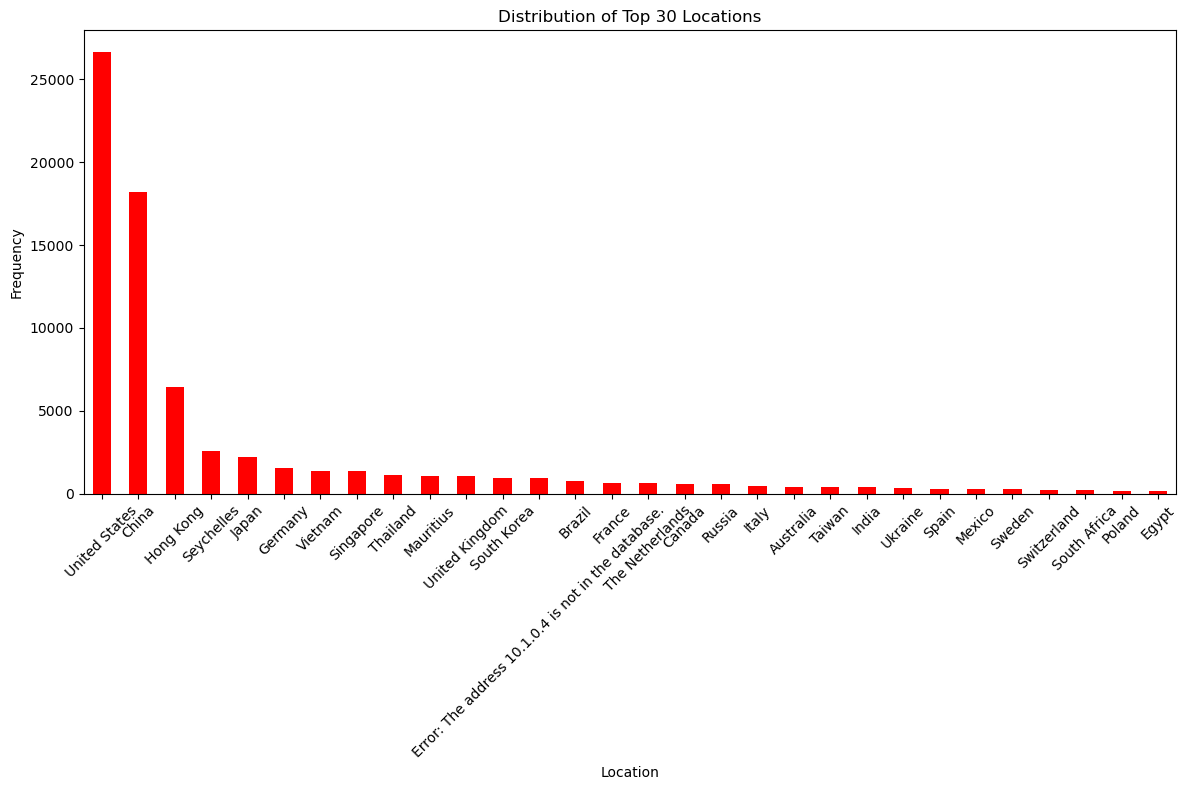

In [110]:
top_30_locations = Feb12['Location'].value_counts().head(30)
plt.figure(figsize=(12, 8))
top_30_locations.plot(kind='bar', color='red')
plt.title('Distribution of Top 30 Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- #### This bar chart displays the United States and China completely dominating with 27,000 and 18,000 occurrences respectively; all other locations fall far behind. From here it's a steep drop to Hong Kong with about 6,500 occurrences, then a few more countries clustered in the 1000-3000 range, with Seychelles, Japan, Germany, and Vietnam in this group as examples. The remaining locations all have fewer than 1,000 occurrences which creates a lengthy flat tail where it's hardly visible in the chart. 

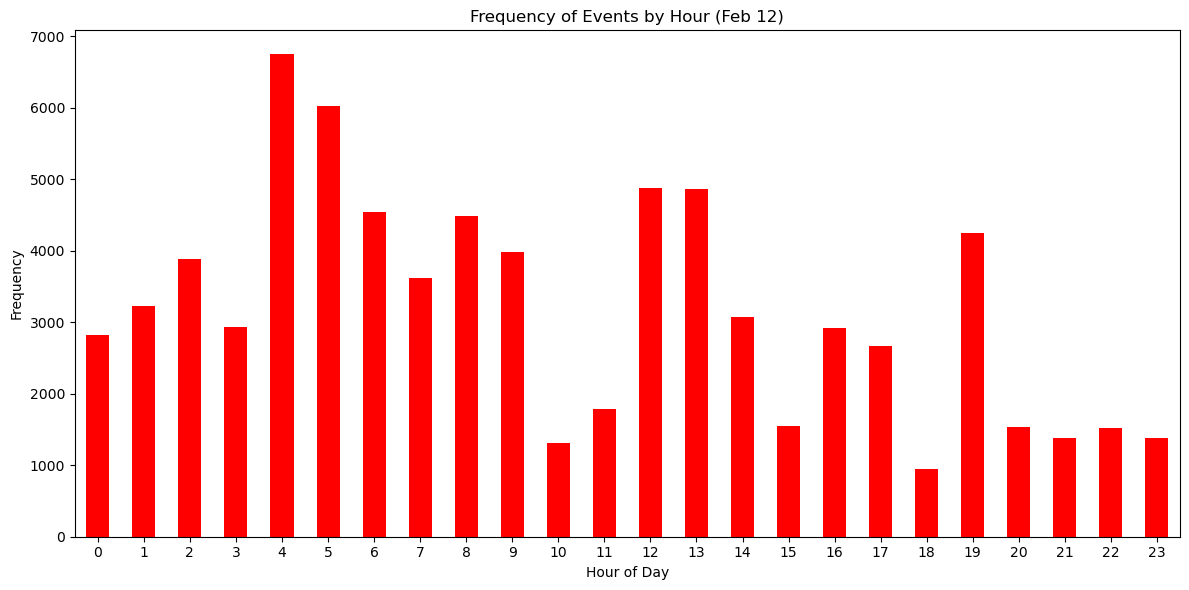

In [107]:
Feb12['Timestamp'] = pd.to_datetime(Feb12['Timestamp'])
Feb12['Hour'] = Feb12['Timestamp'].dt.hour
hourly_counts = Feb12['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='red')
plt.title('Frequency of Events by Hour (Feb 12)')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- #### This bar chart shows activity levels throughout a 24-hour period on February 12, and you can definitely see patterns of human activity. There is a dramatic spike toward 4-5 AM (about 7000 events). this could suggest maybe automated processes or maybe a system that operates outside normal human schedule. Activity is lower during normal bedtime hours (10 PM - midnight), and then builds gradually through the early morning of the day. There is a second peak in activity during normal business hours around 12-1 PM (noon), and some activity again around 7 PM. 

In [50]:
print("Attack Type Counts:")
print(Feb12["Label"].value_counts())

Attack Type Counts:
Label
ddospot       72287
cowrie         2106
log4pot        1388
ciscoasa        195
adbhoney        180
elasticpot       63
mailoney         49
redispot         35
Name: count, dtype: int64


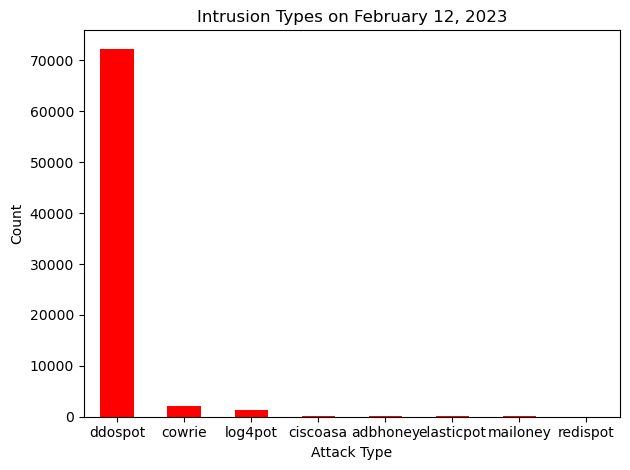

In [93]:
Feb12["Label"].value_counts().plot(kind='bar', color='red')
plt.title("Intrusion Types on February 12, 2023")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- #### ddospot dominates with over 70,000 detections
- #### cowrie has around 2,000-3,000 detections
- #### log4pot has roughly 1,000-2,000 detections
- #### ciscoasa, adbhoneyelastic, potmailoney, redispot has under 1,000 detections each 

In [52]:
print("\nProtocol Distribution:")
print(Feb12["Protocol"].value_counts())


Protocol Distribution:
Protocol
17    72284
6      4019
Name: count, dtype: int64


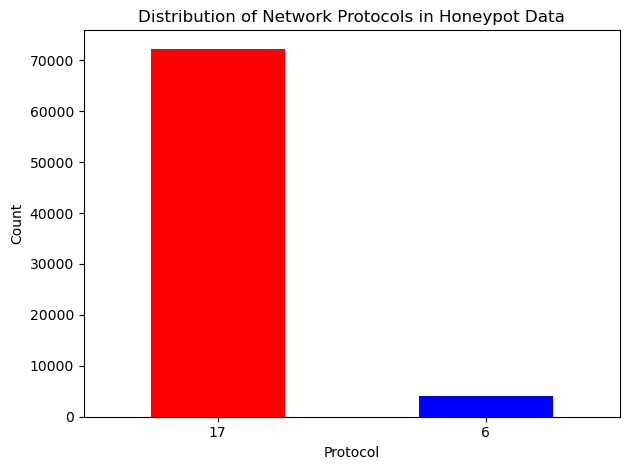

In [95]:
Feb12["Protocol"].value_counts().plot(kind='bar', color=['red','blue'])
plt.title("Distribution of Network Protocols in Honeypot Data")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- #### Protocol 17 has about 72,000 connections. That's about 95% of all traffic
- #### Protocol 6 has only about 4,000 connections. 

In [54]:
print("\nTop 10 Targeted Ports:")
print(Feb12["Dst Port"].value_counts().head(10))


Top 10 Targeted Ports:
Dst Port
123     72220
22        997
23        598
80        560
443       503
8080      166
5555      147
8443      137
25         43
9200       42
Name: count, dtype: int64


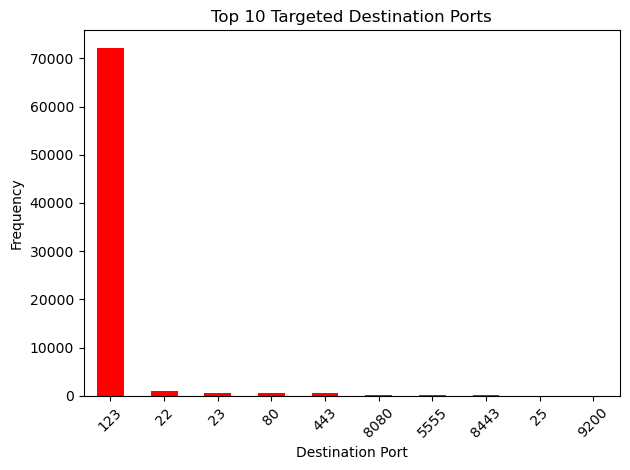

In [97]:
top_dst_ports = Feb12['Dst Port'].value_counts().head(10)
top_dst_ports.plot(kind='bar', color='red')
plt.title('Top 10 Targeted Destination Ports')
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- #### Port 123 is getting over 70,000 attempts to break in. All the other doors barely have anyone trying them.

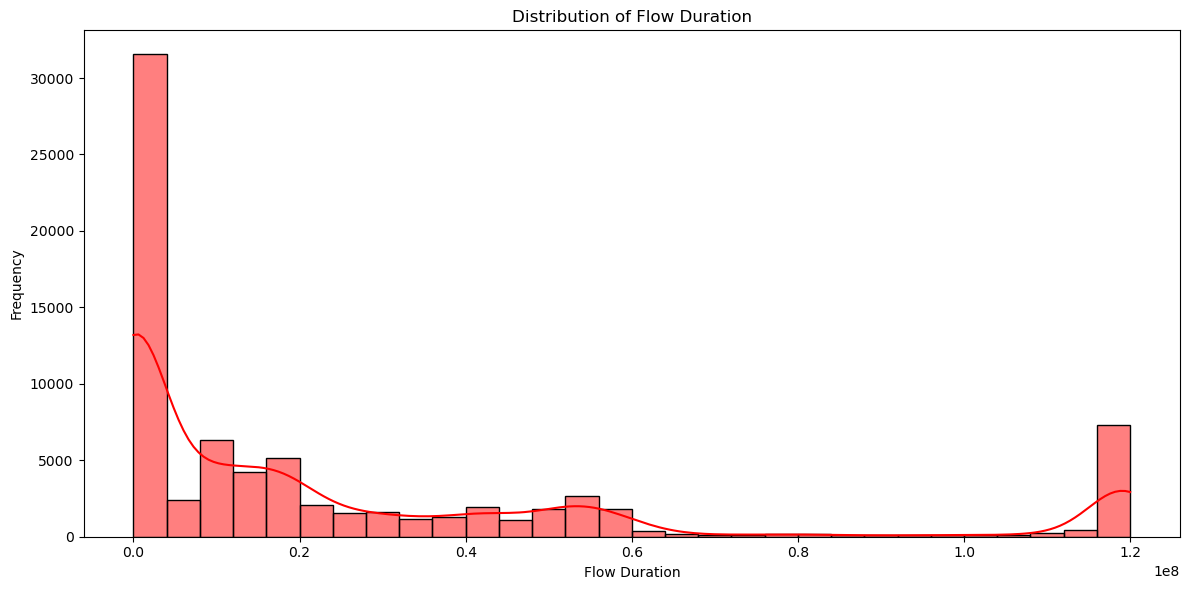

In [98]:
plt.figure(figsize=(12, 6))
sns.histplot(Feb12['Flow Duration'], bins=30, kde=True, color='red')
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- #### The bar chart shows the majority of "flows" are quick, while a very small number are very long. More than 30,000 events happen almost instantly. There is another smaller peak of about 7,000 events, still tryin to understand what this means. 

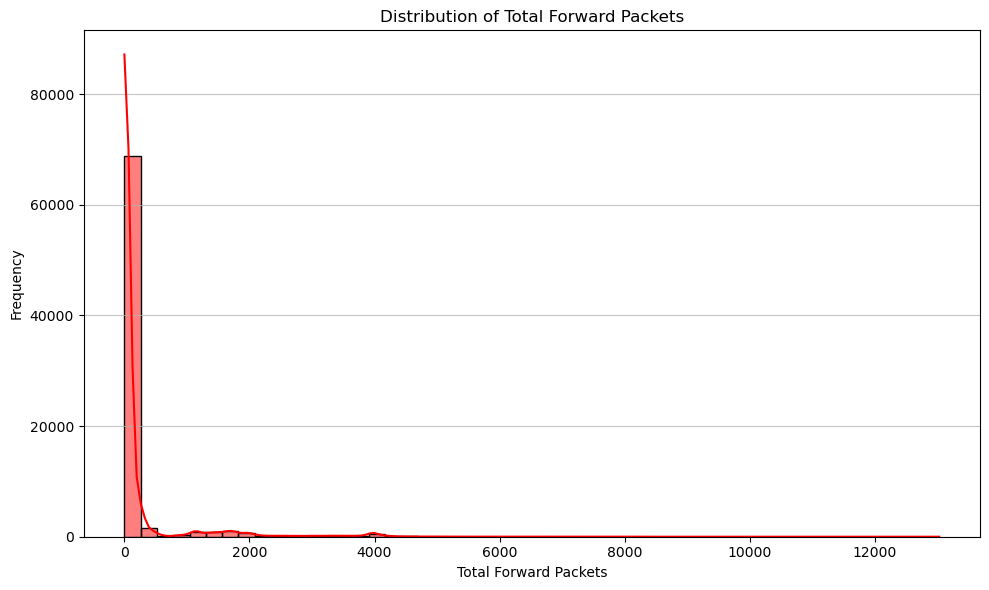

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(Feb12['Total Fwd Packet'], bins=50, kde=True, color='red')
plt.title('Distribution of Total Forward Packets')
plt.xlabel('Total Forward Packets')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

- #### This bar chart shows that most network connections about 70,000 connections don't send packets at all. Will conitnue to take a look at this. 

In [112]:
# Select the top 30 features based on variance
top_30_features = numeric_cols.var().sort_values(ascending=False).head(30).index

# Print each column name in the top 30 list
for col in top_30_features:
    print(col)

Idle Min
Idle Mean
Idle Std
Idle Max
Fwd IAT Total
Flow Duration
Active Max
Active Mean
Active Min
Flow IAT Max
Fwd IAT Max
Fwd IAT Mean
Flow IAT Mean
Fwd IAT Min
Flow IAT Min
Active Std
Flow IAT Std
Fwd IAT Std
Bwd IAT Total
Bwd IAT Max
Bwd Bulk Rate Avg
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Min
Packet Length Variance
Src Port
Bwd Bytes/Bulk Avg
Fwd Packets/s
Total Length of Bwd Packet
FWD Init Win Bytes


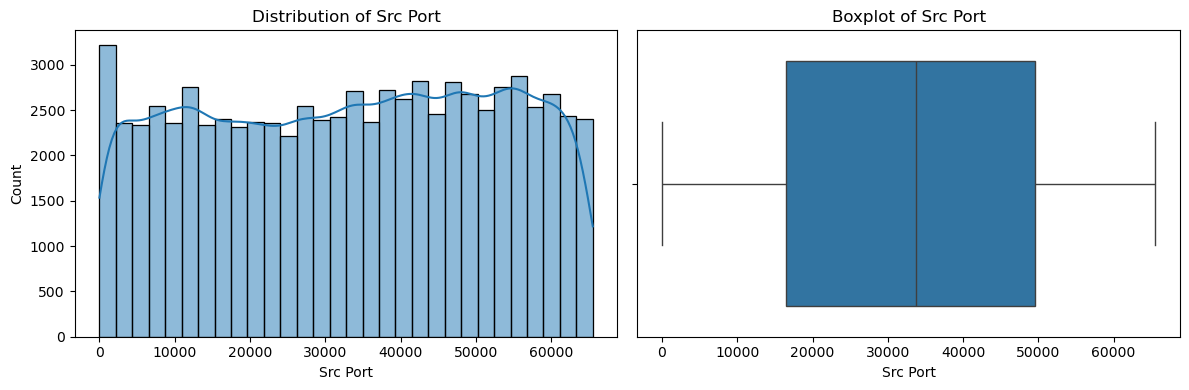

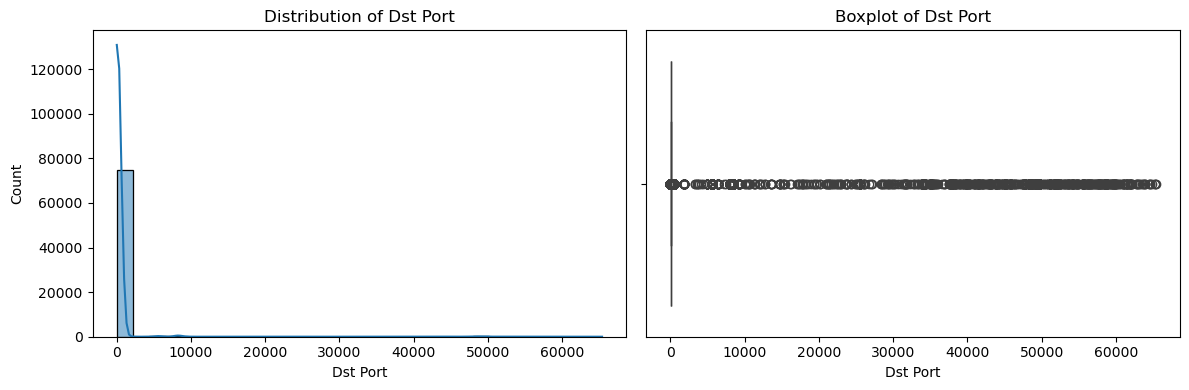

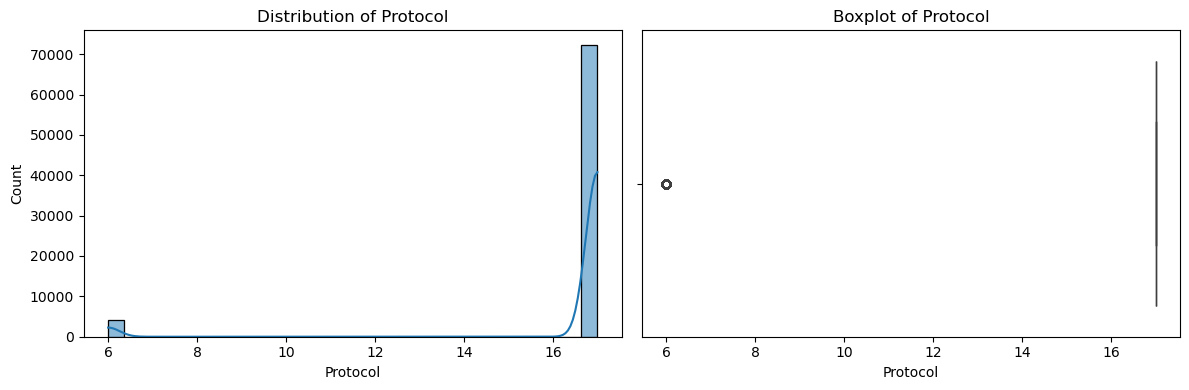

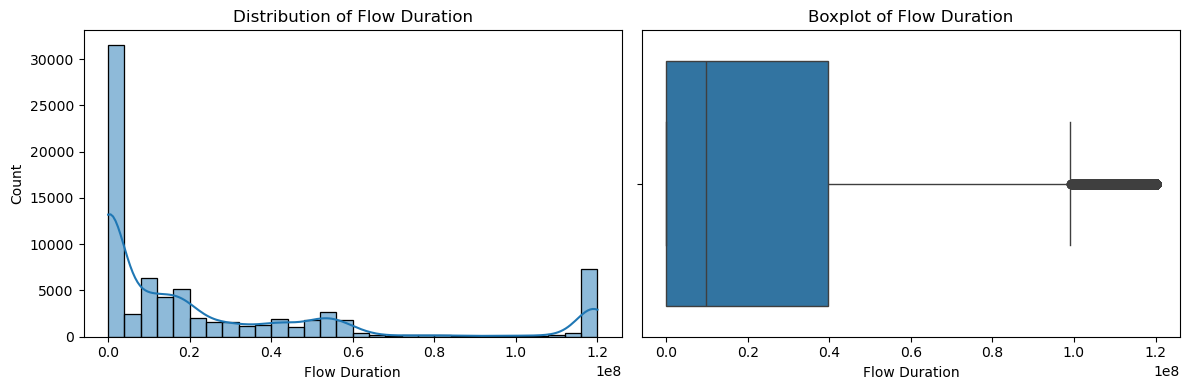

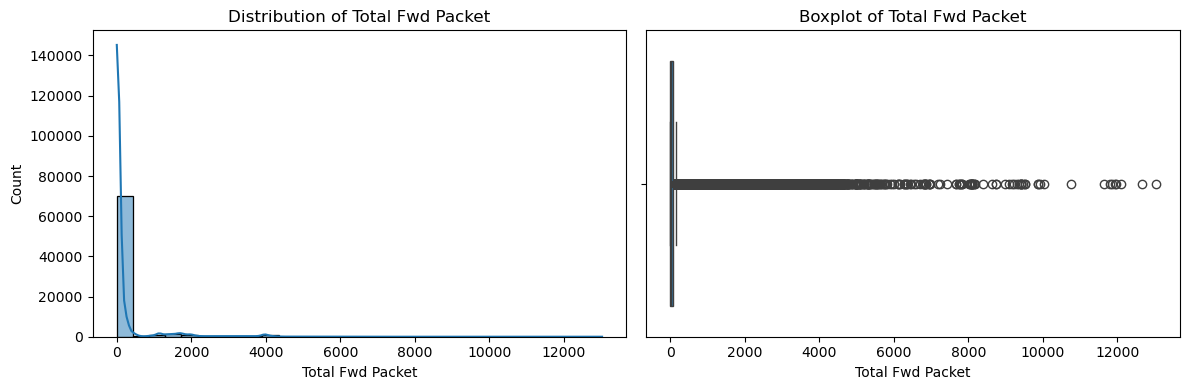

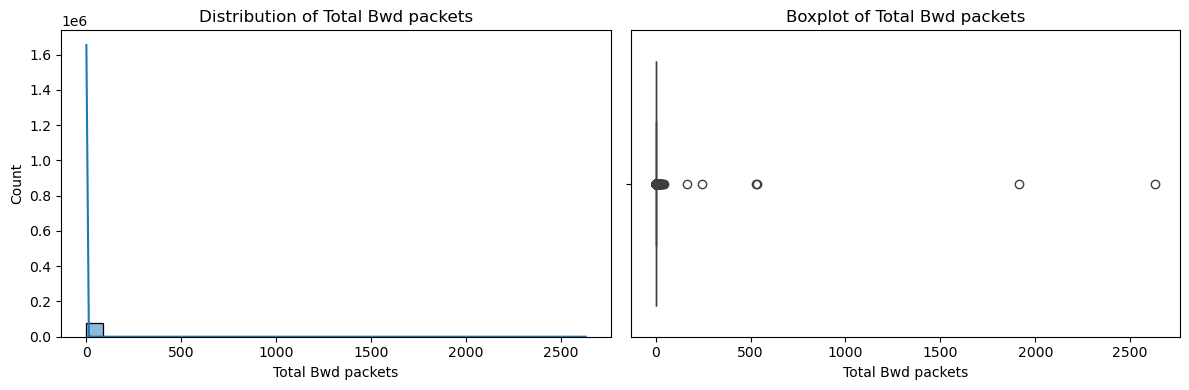

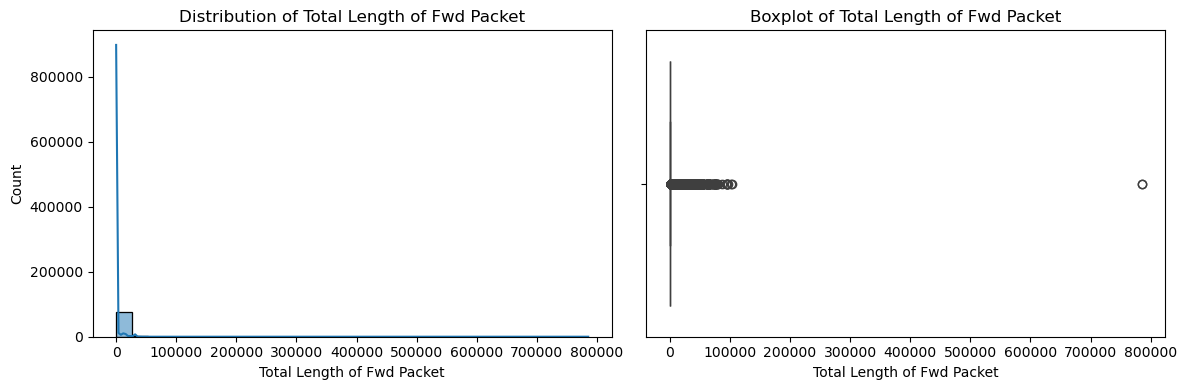

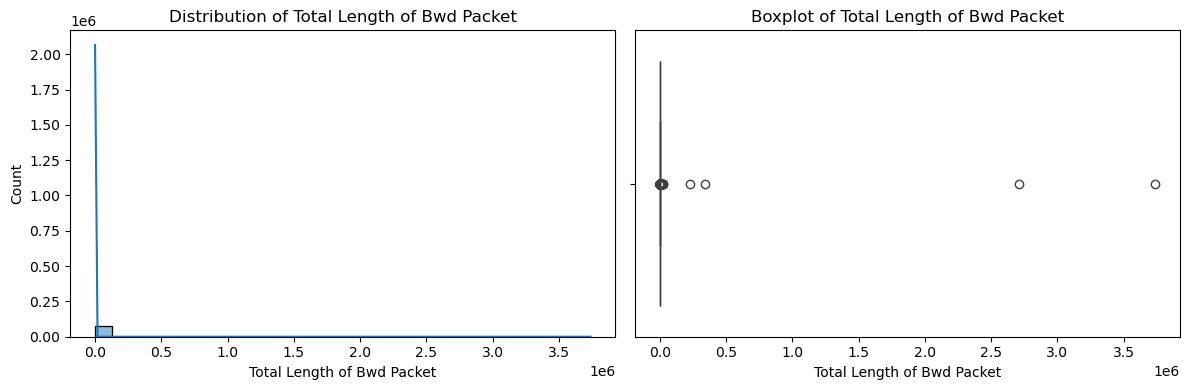

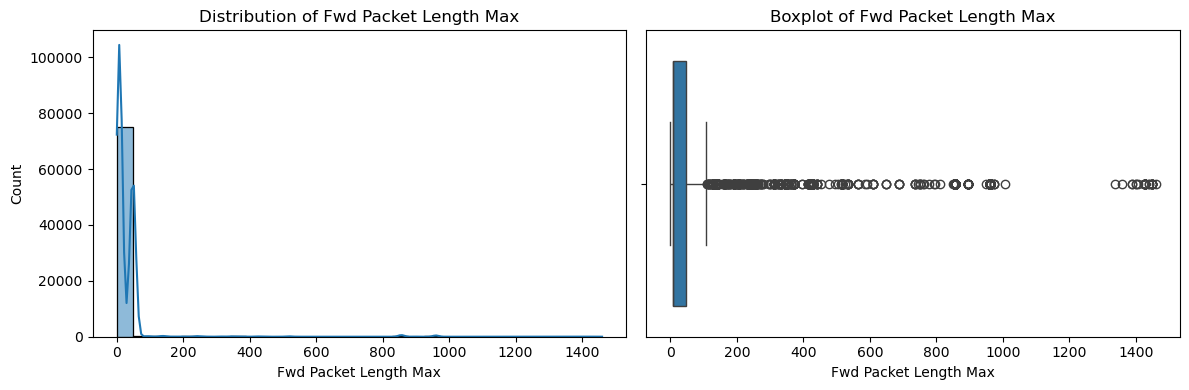

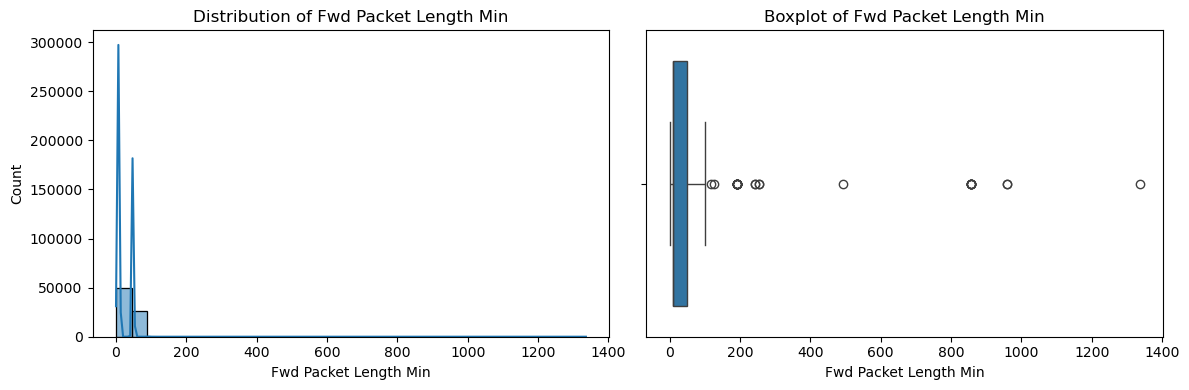

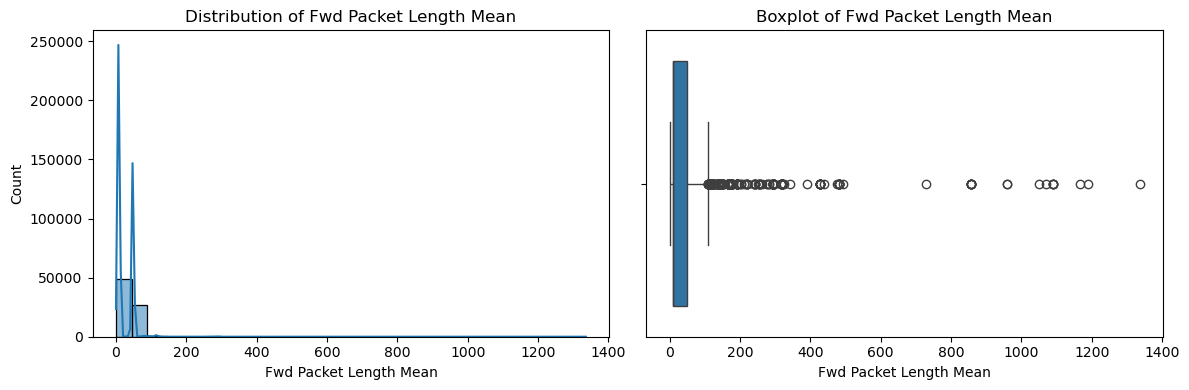

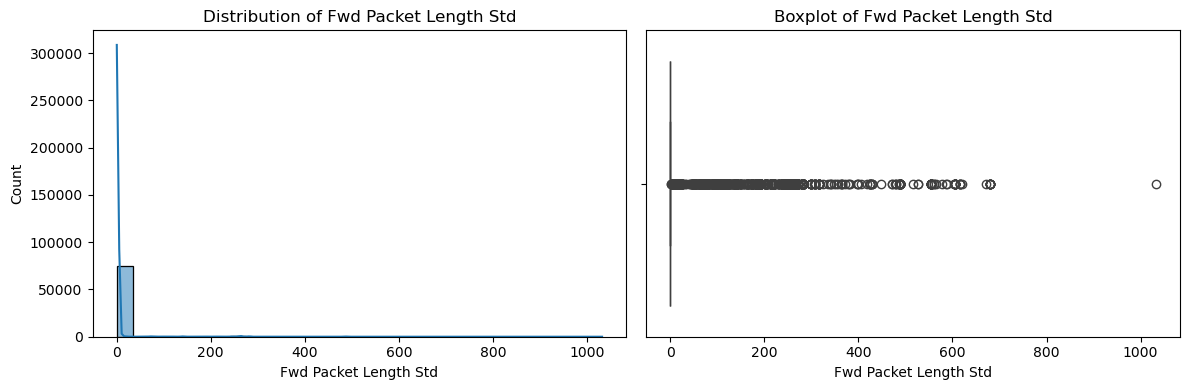

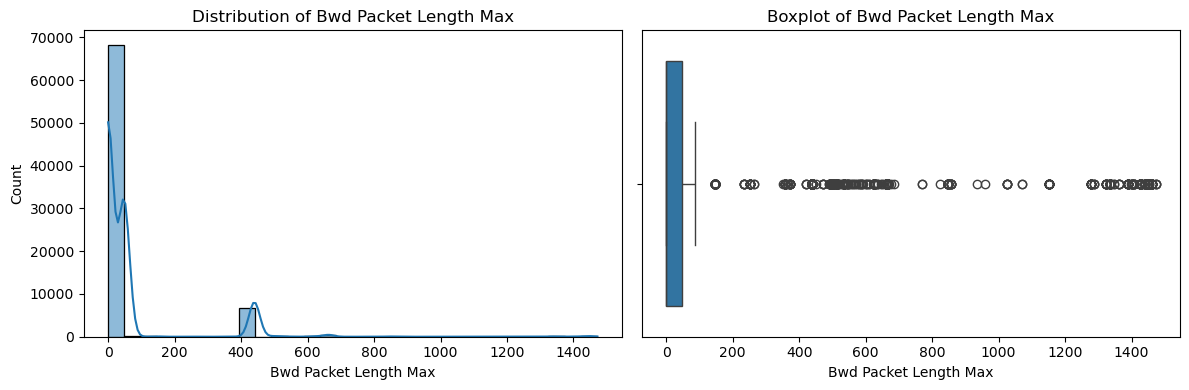

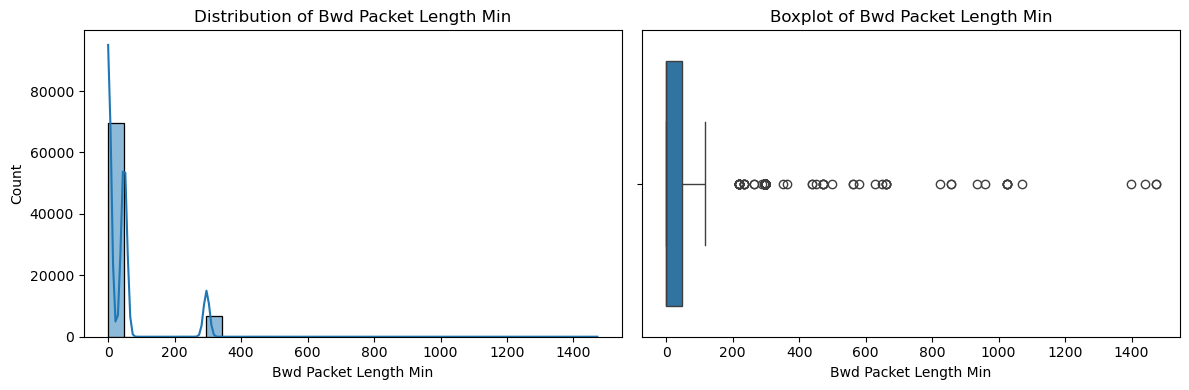

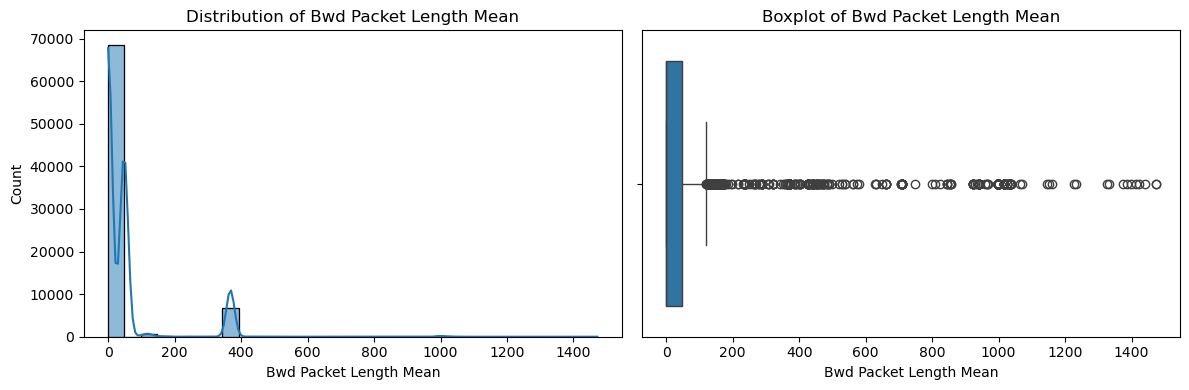

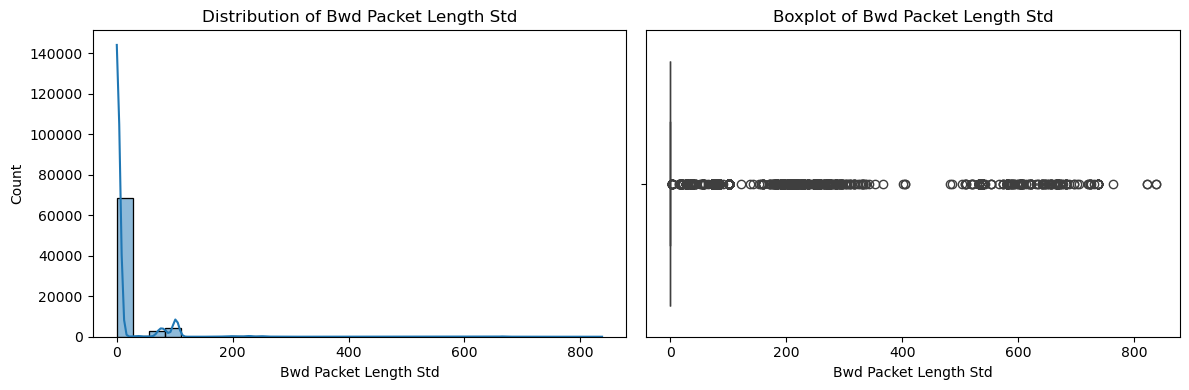

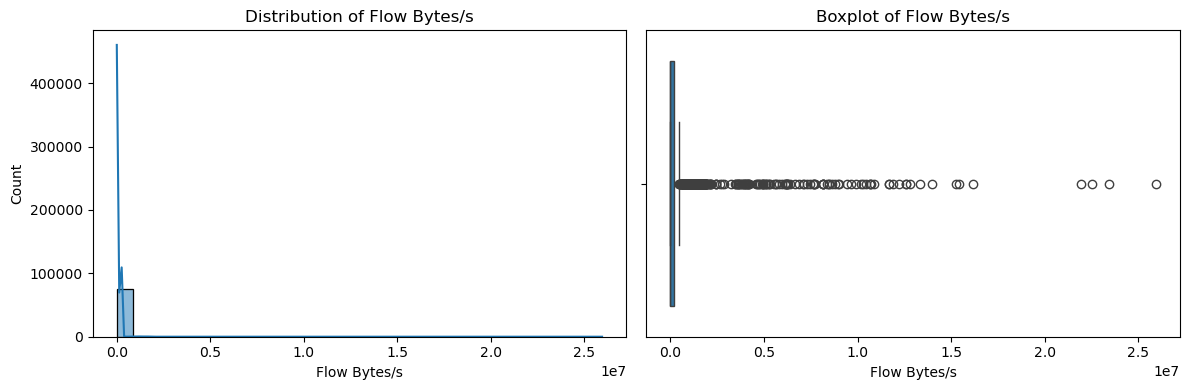

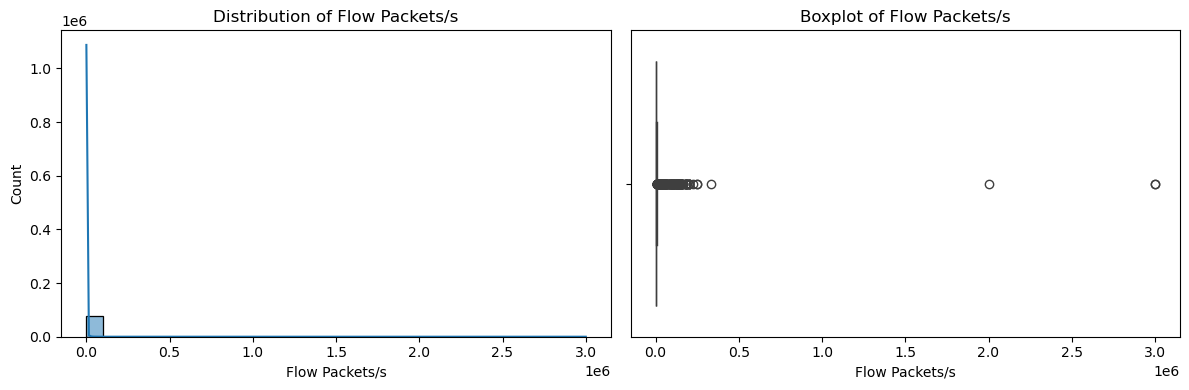

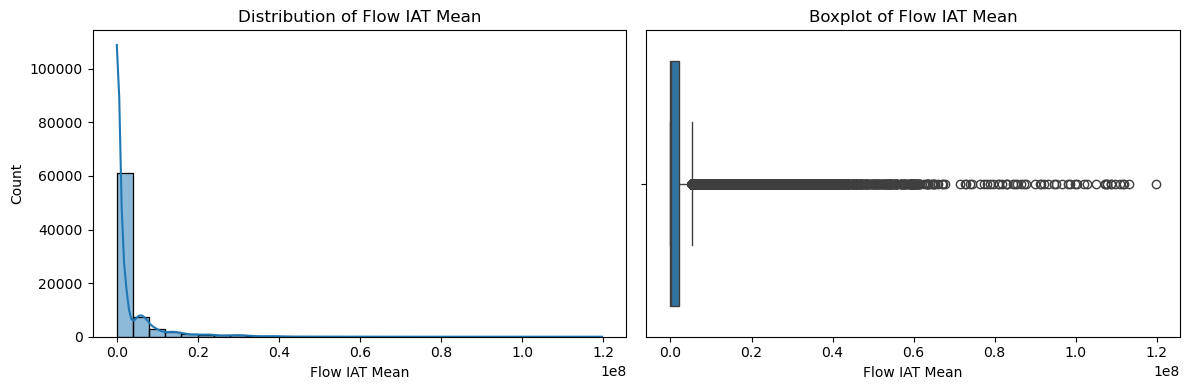

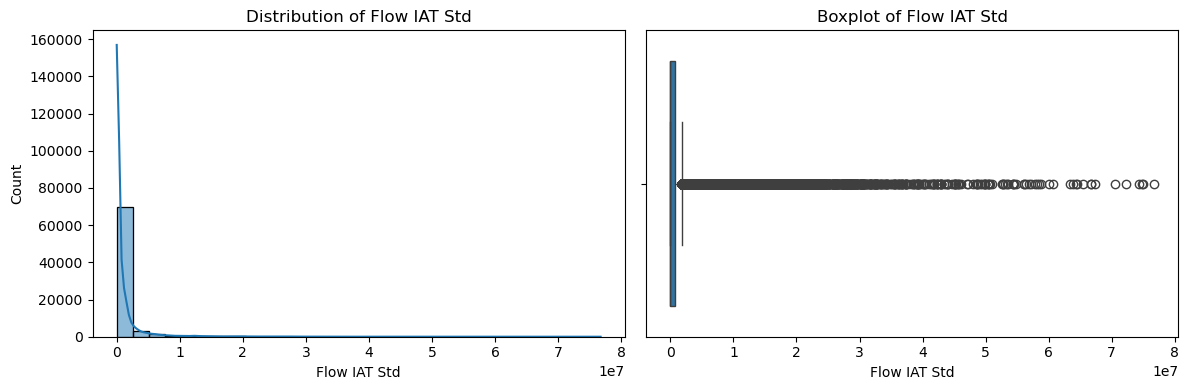

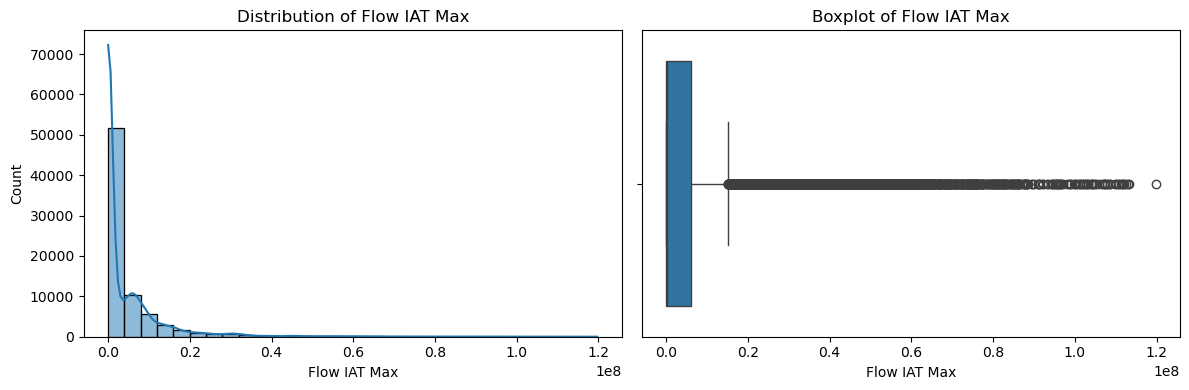

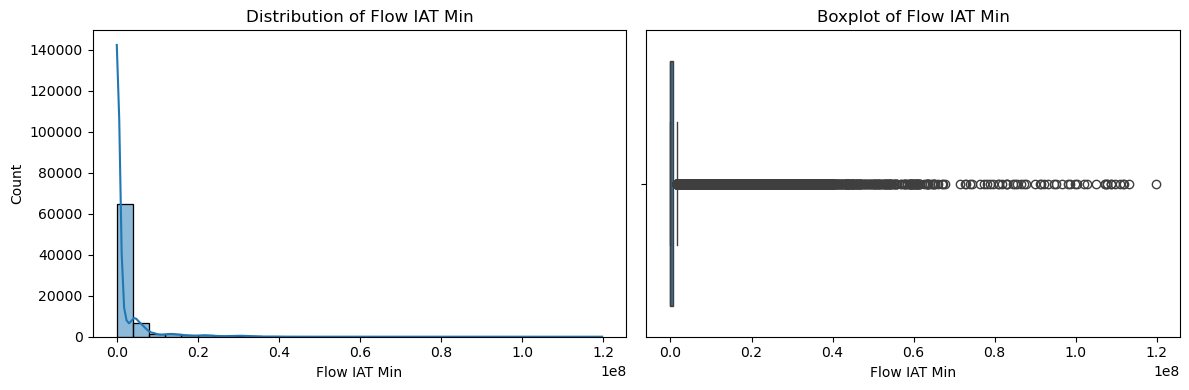

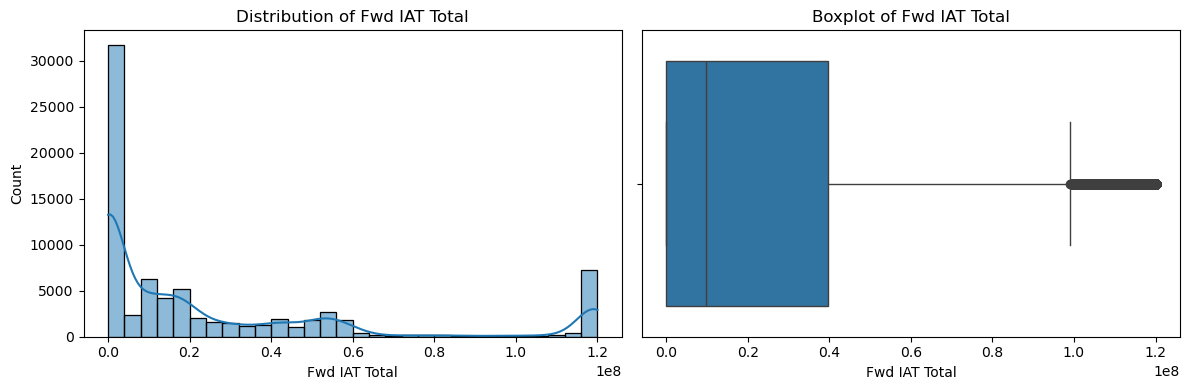

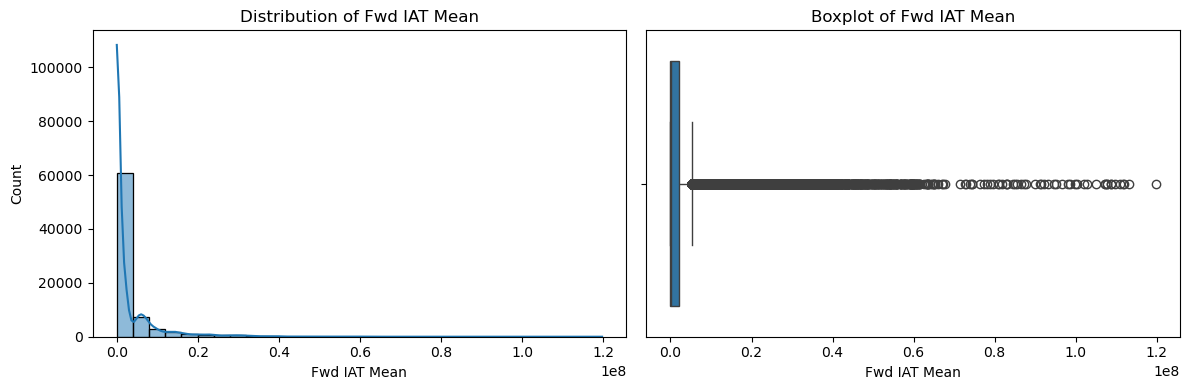

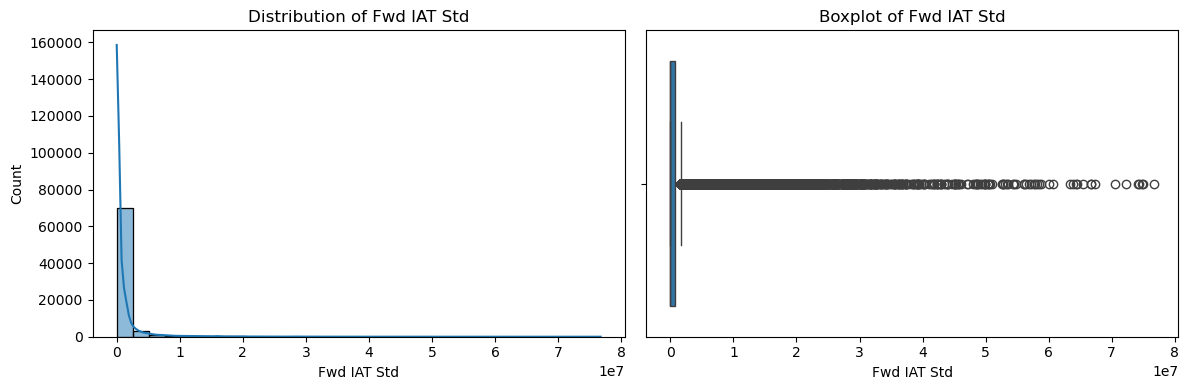

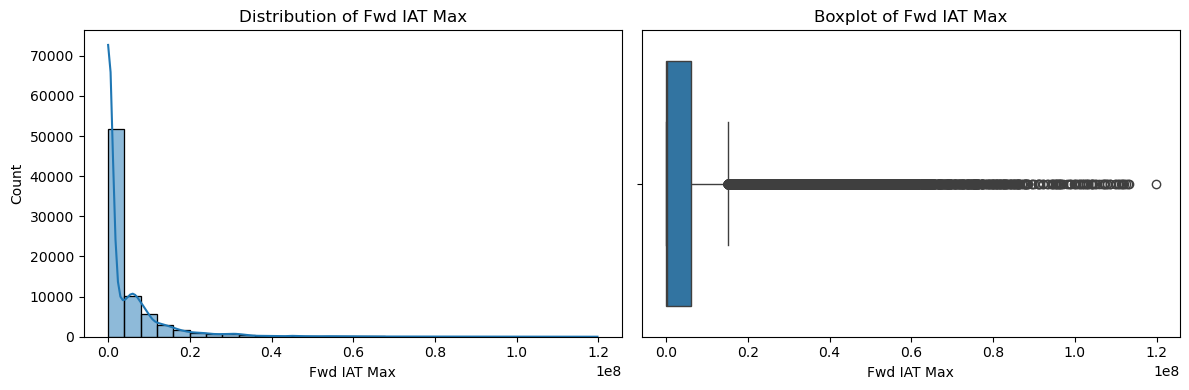

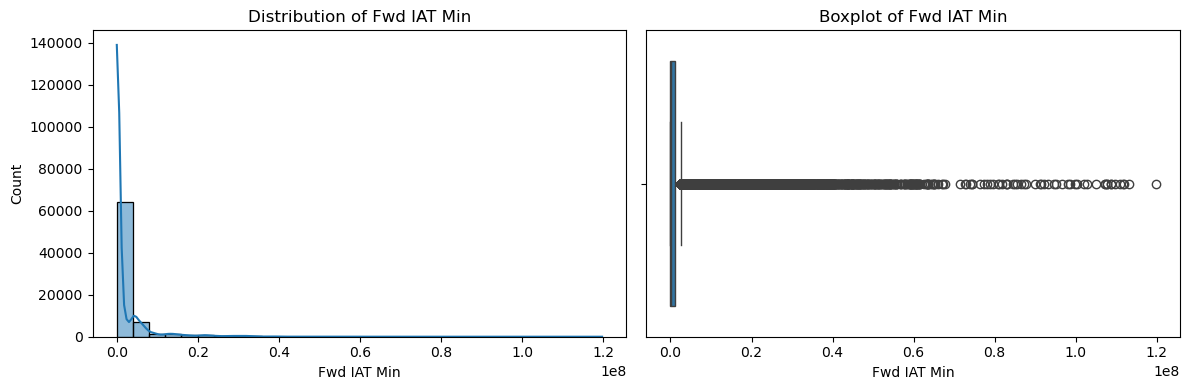

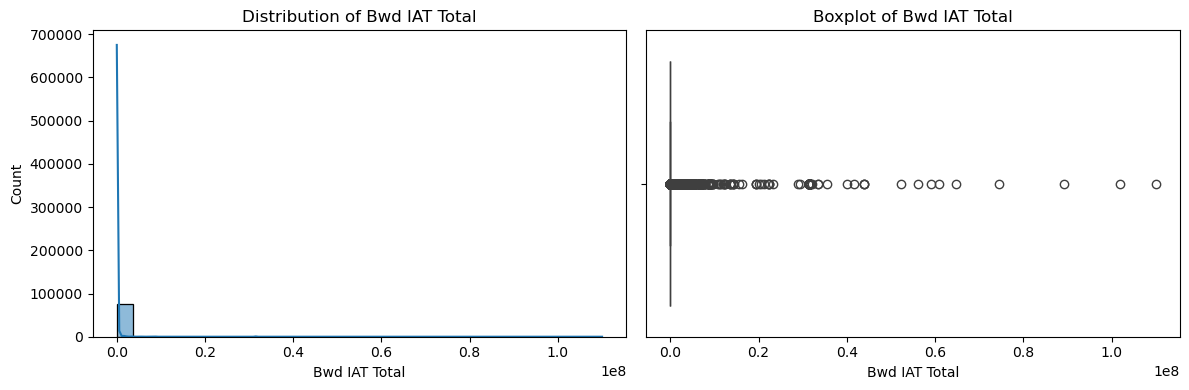

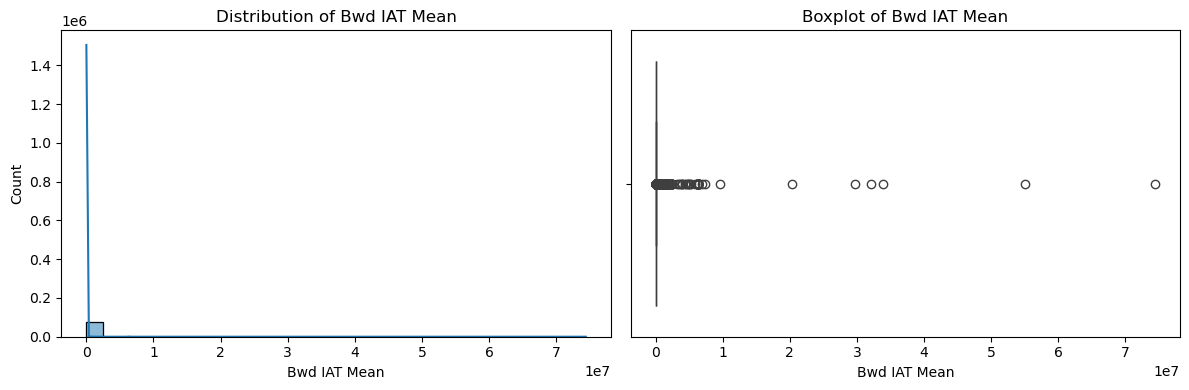

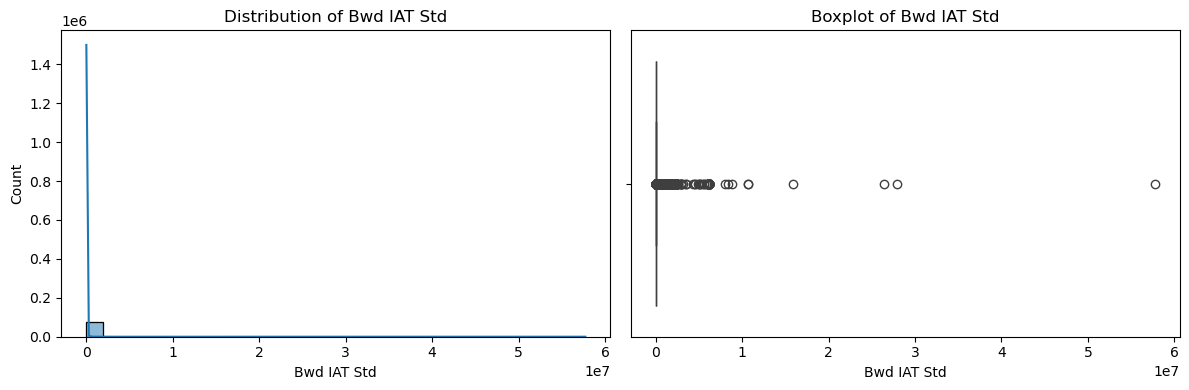

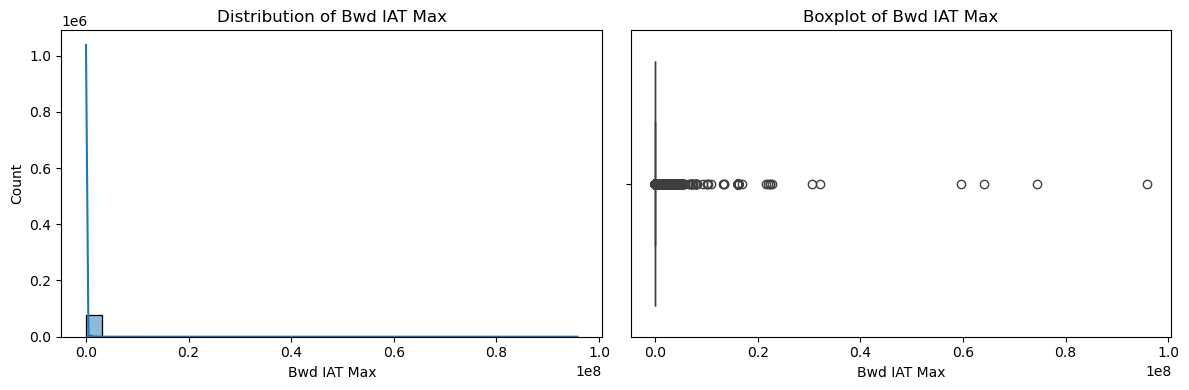

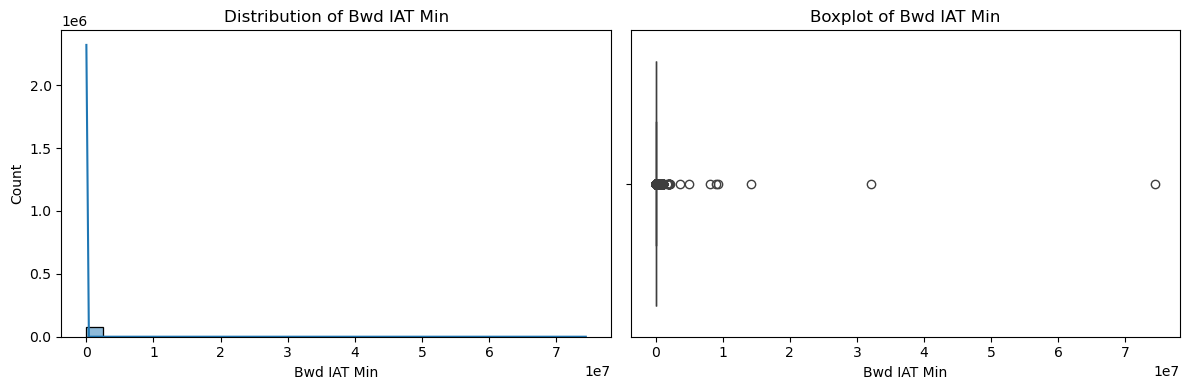

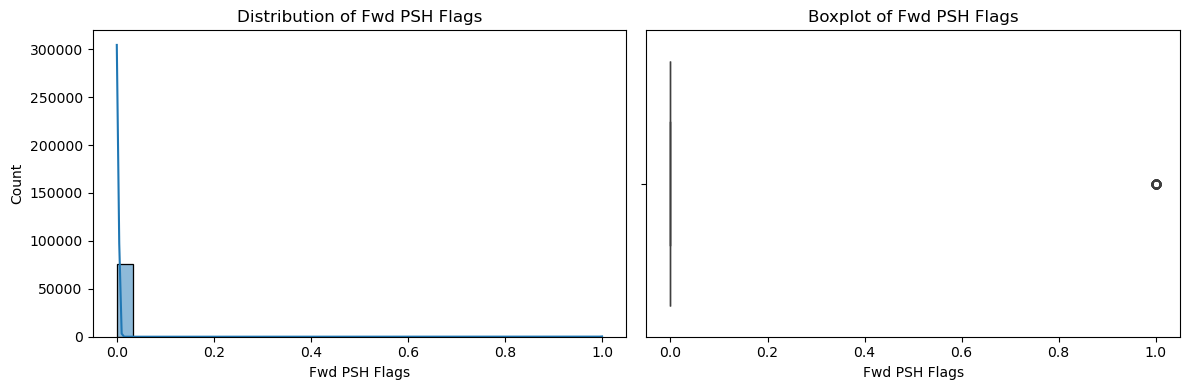

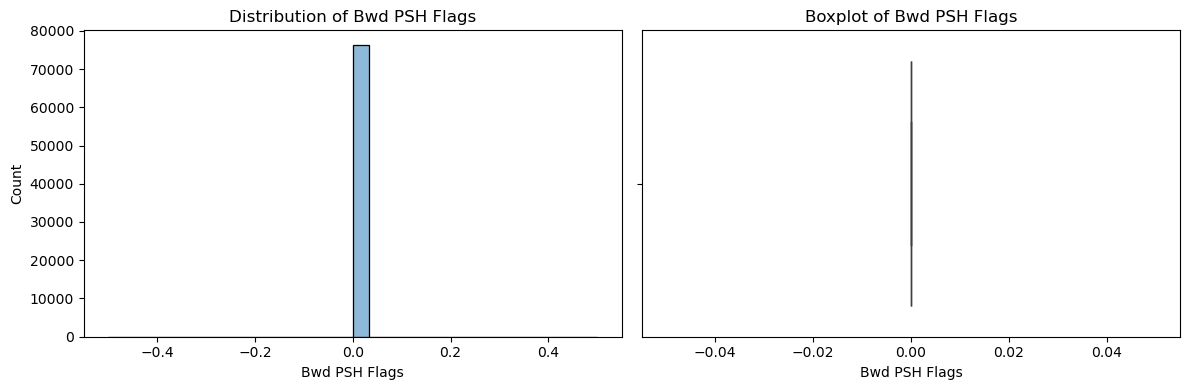

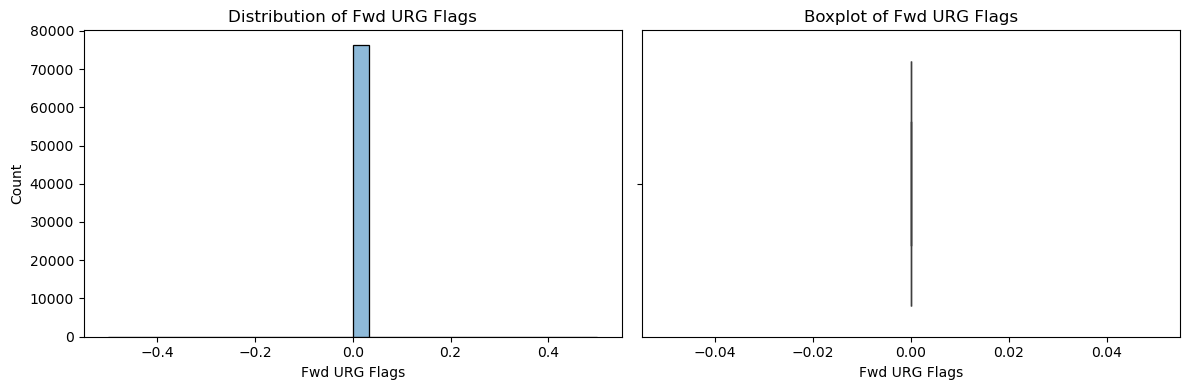

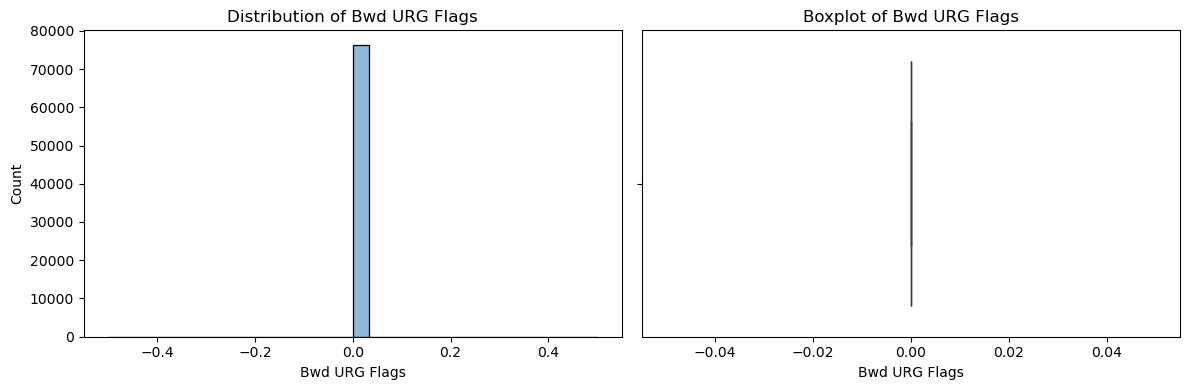

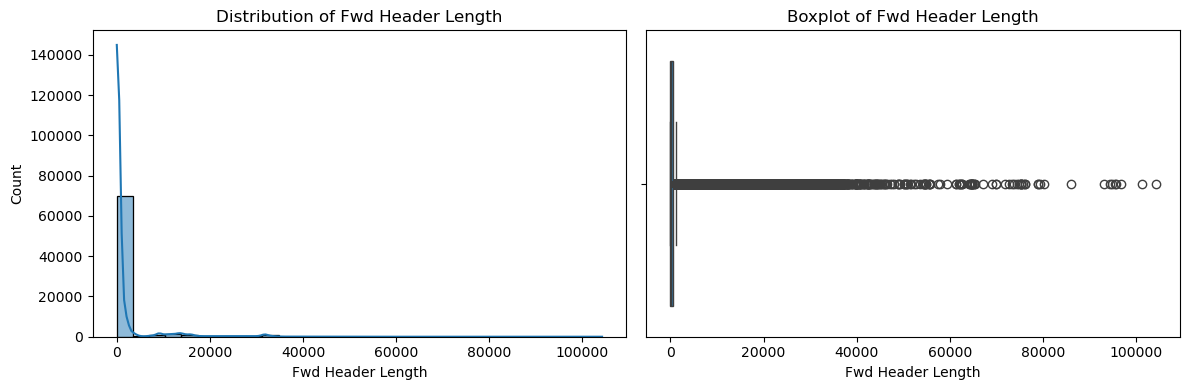

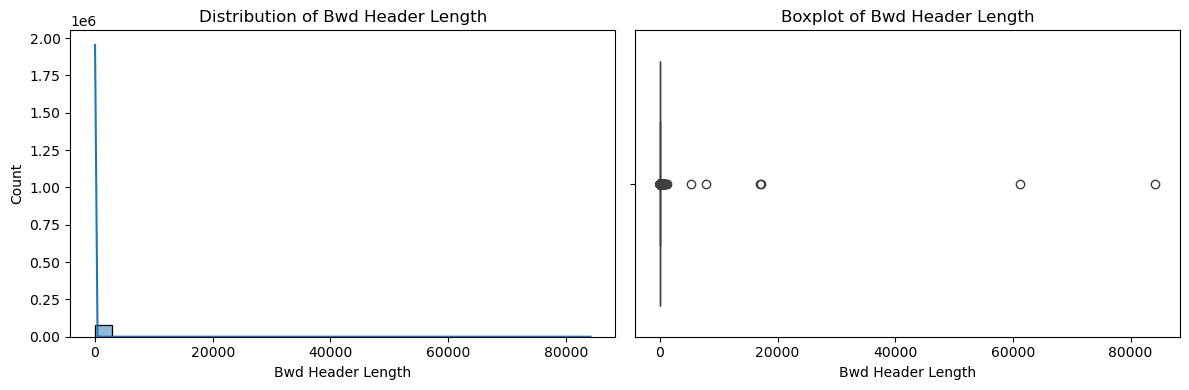

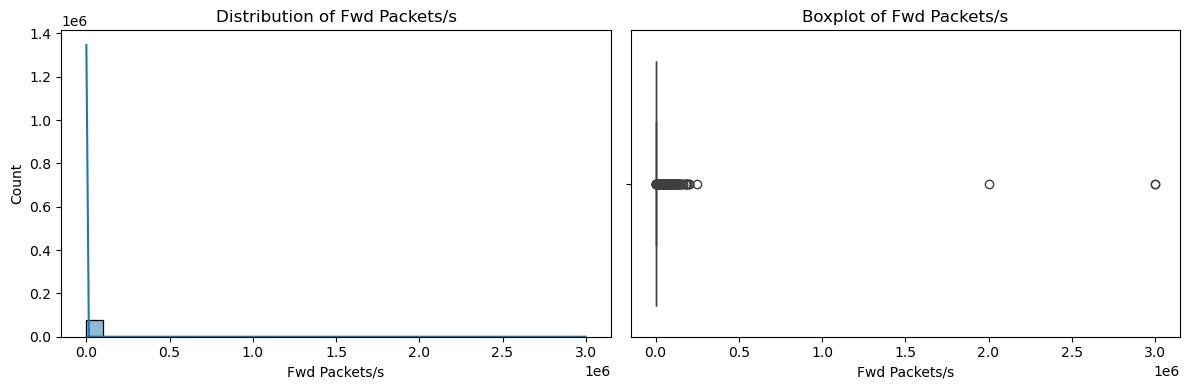

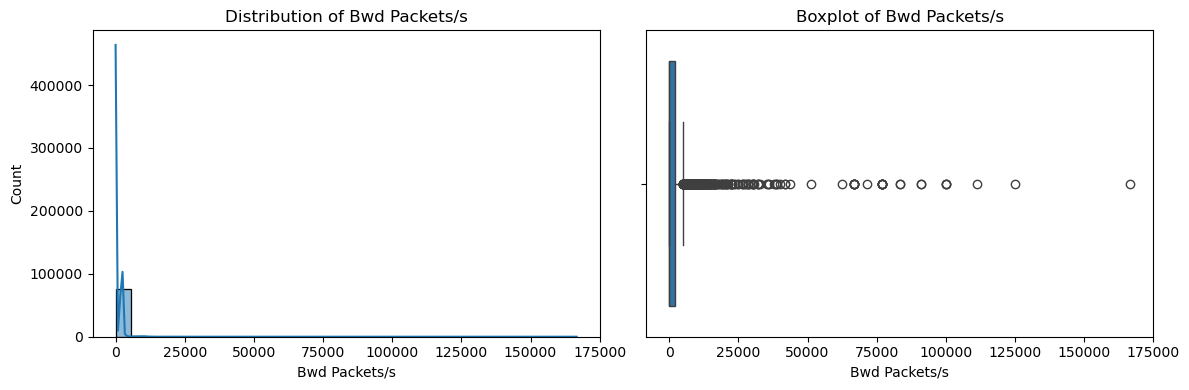

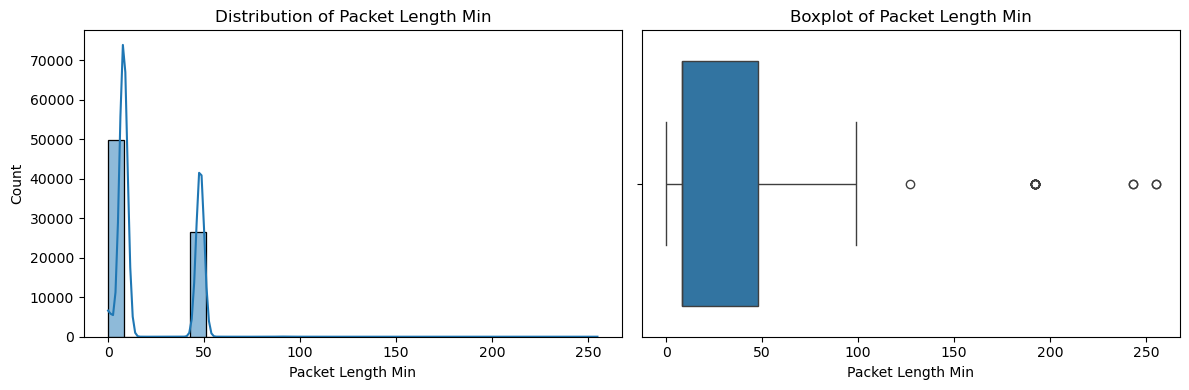

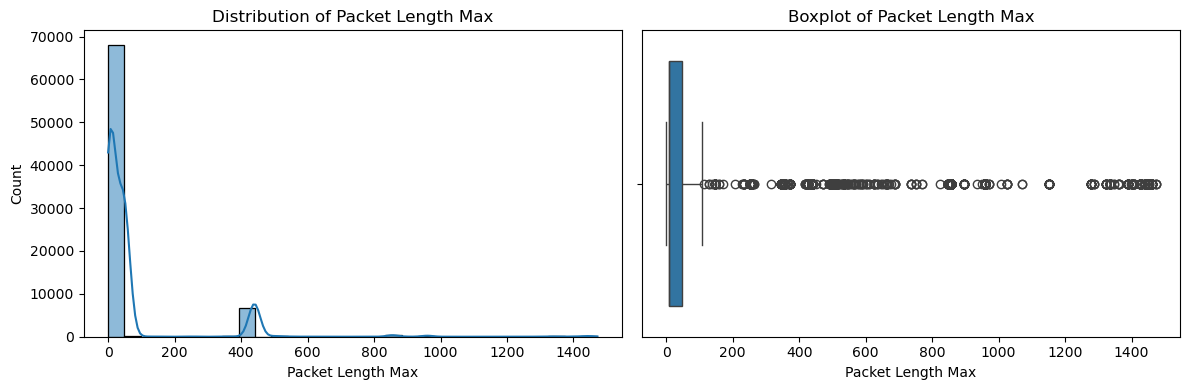

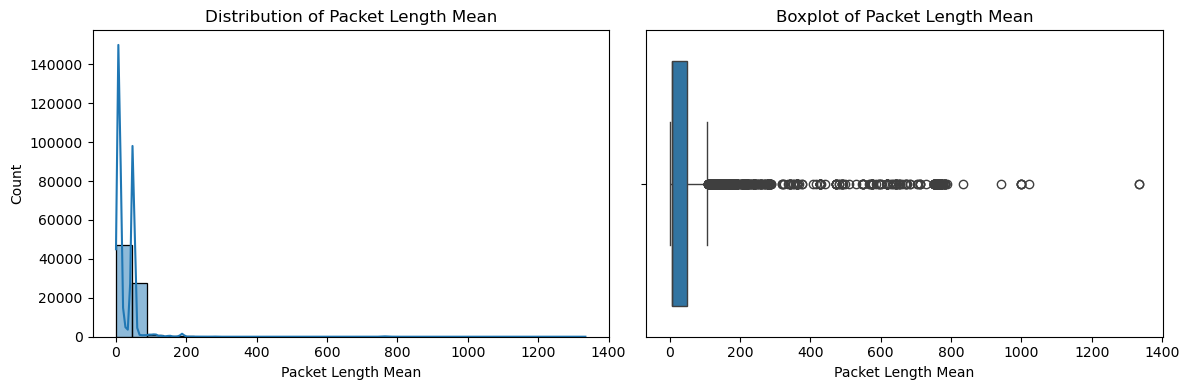

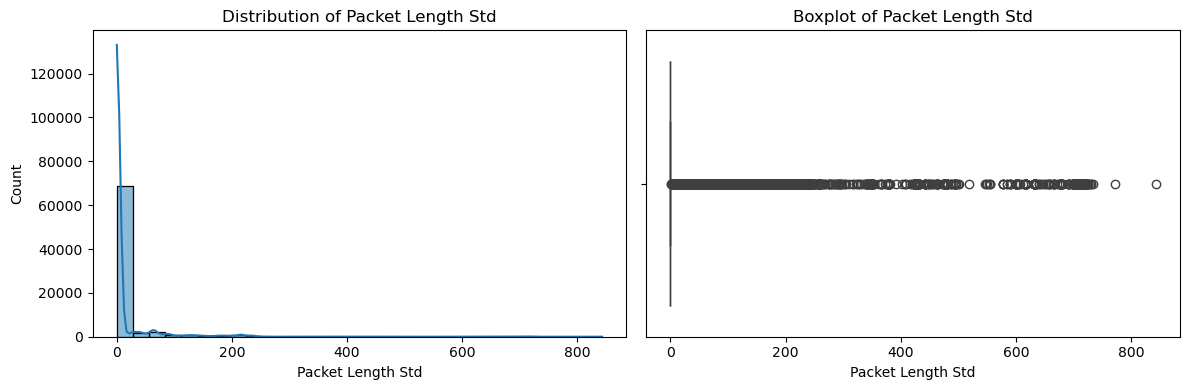

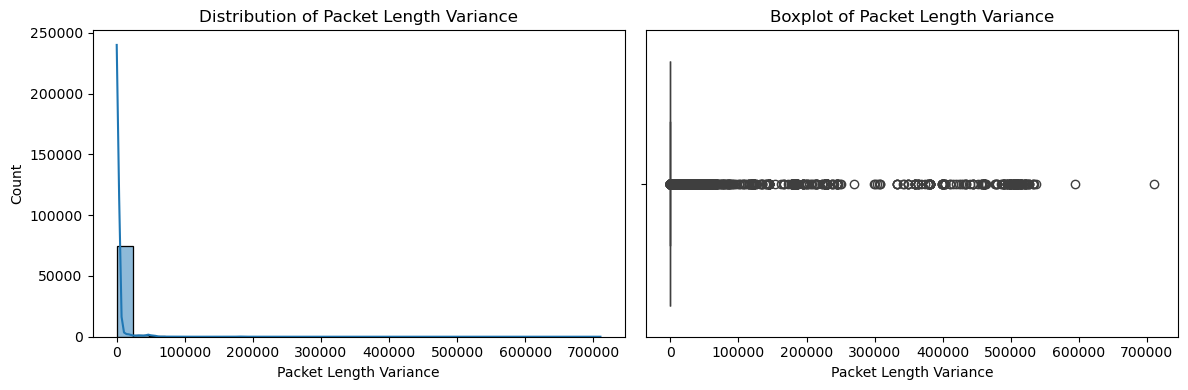

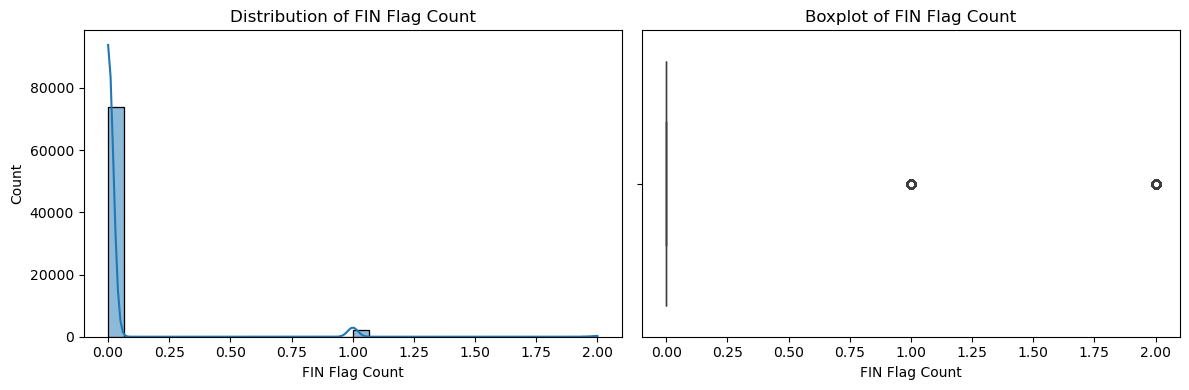

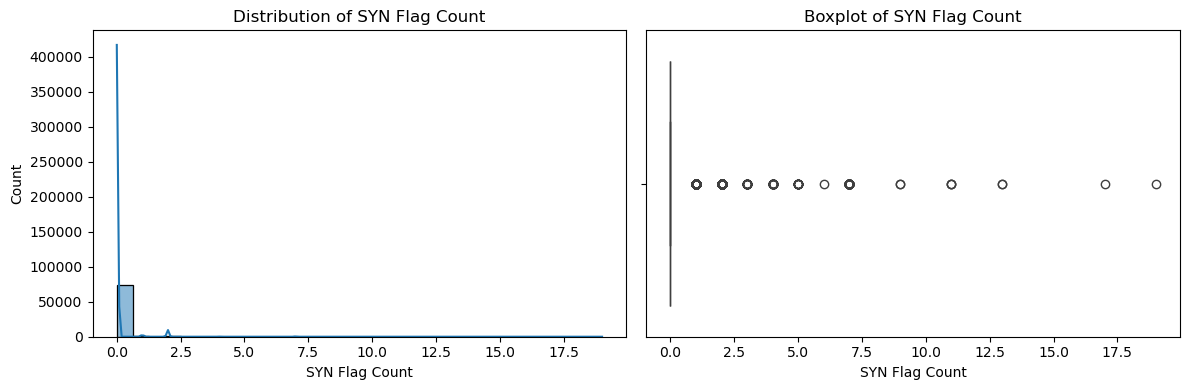

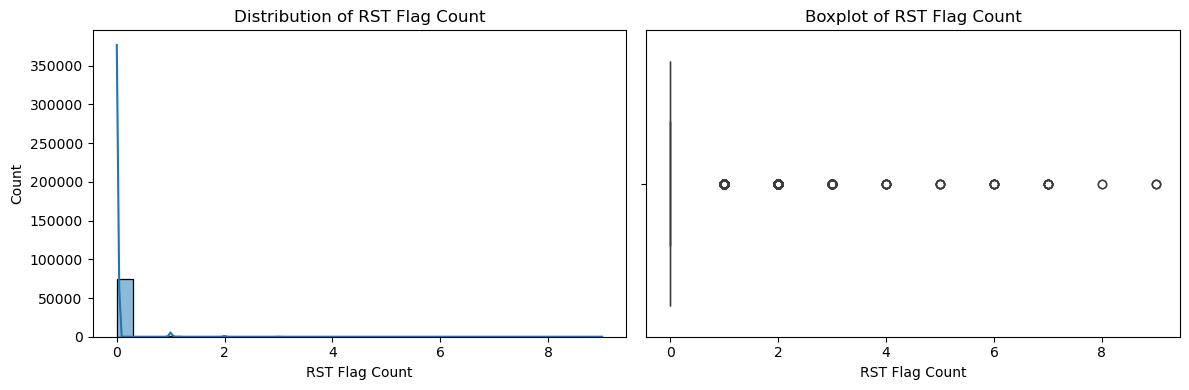

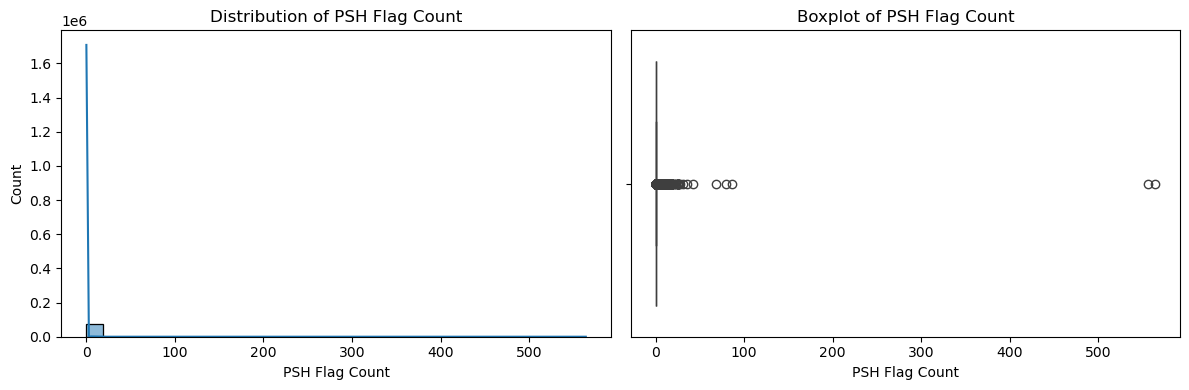

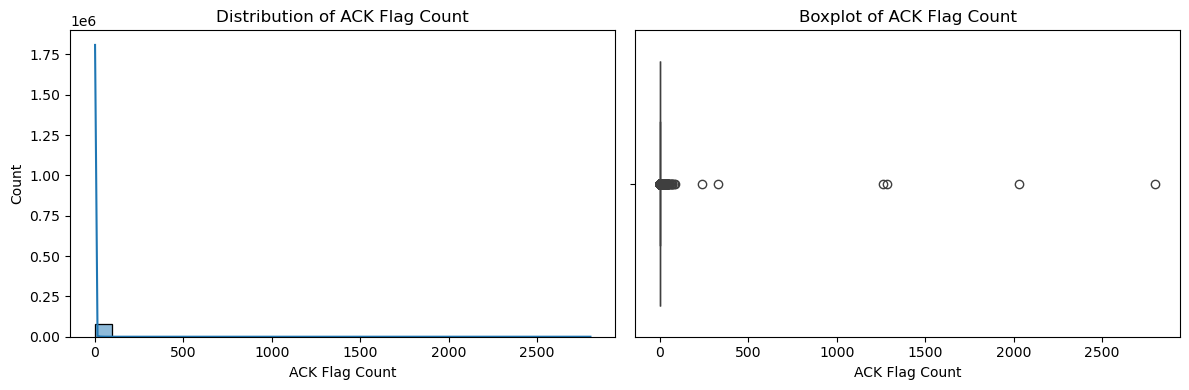

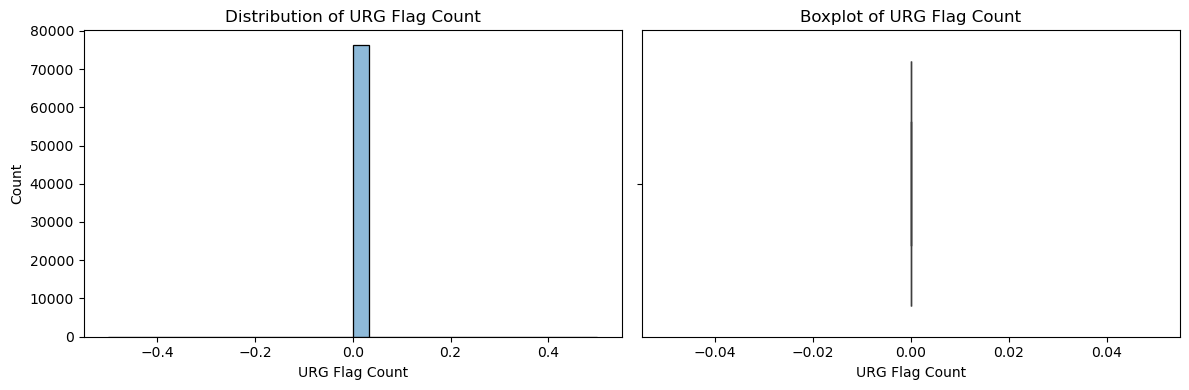

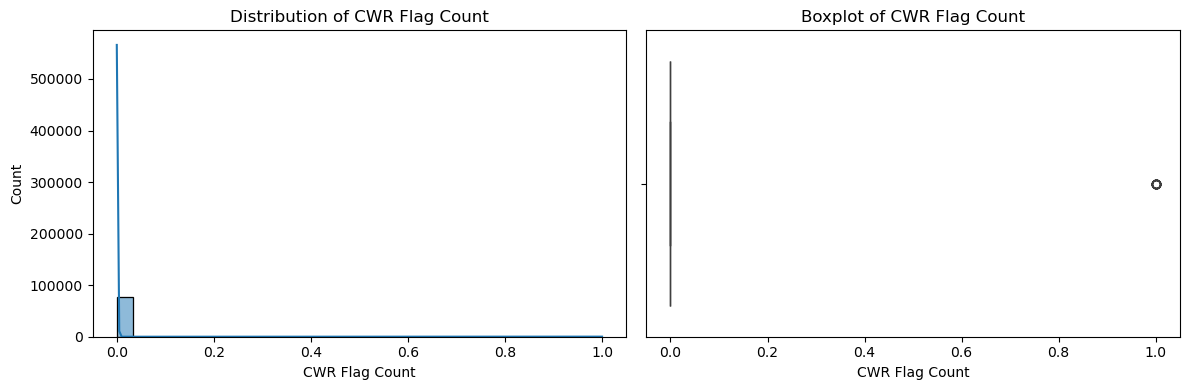

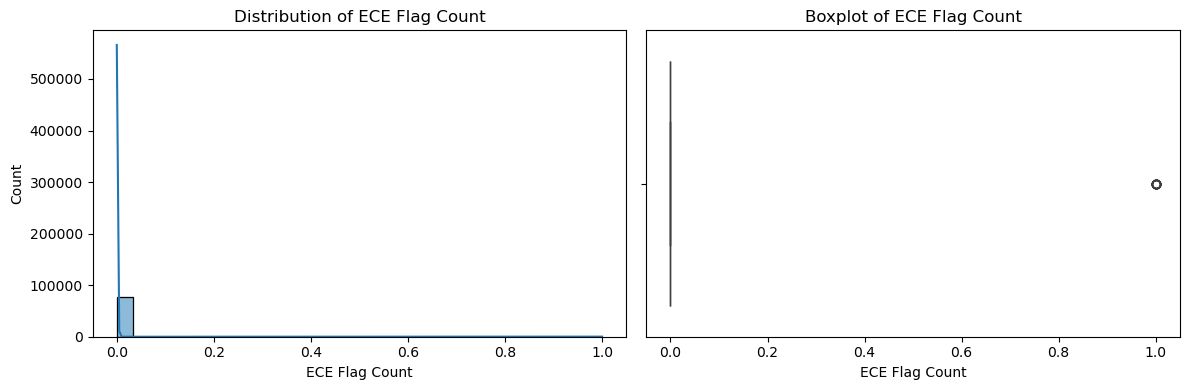

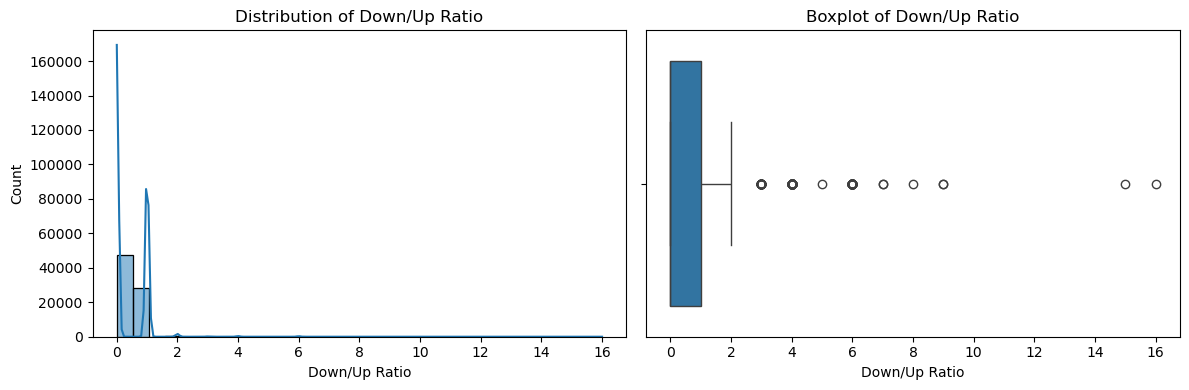

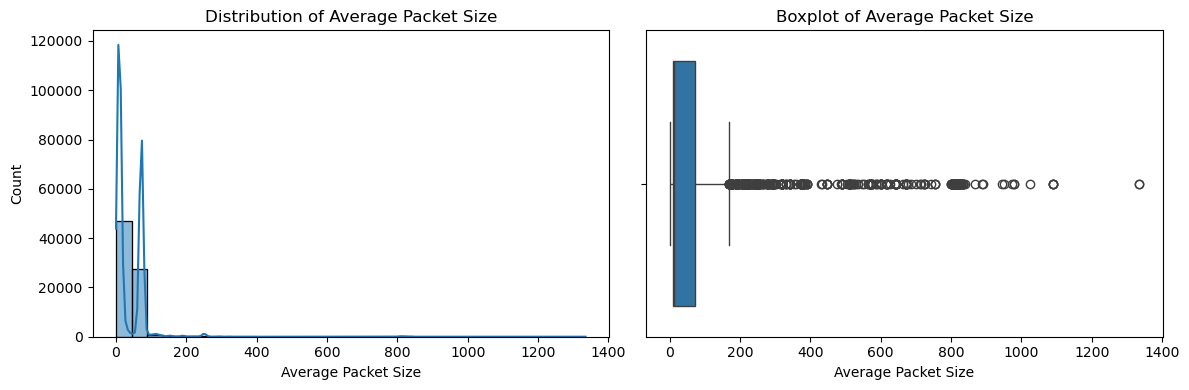

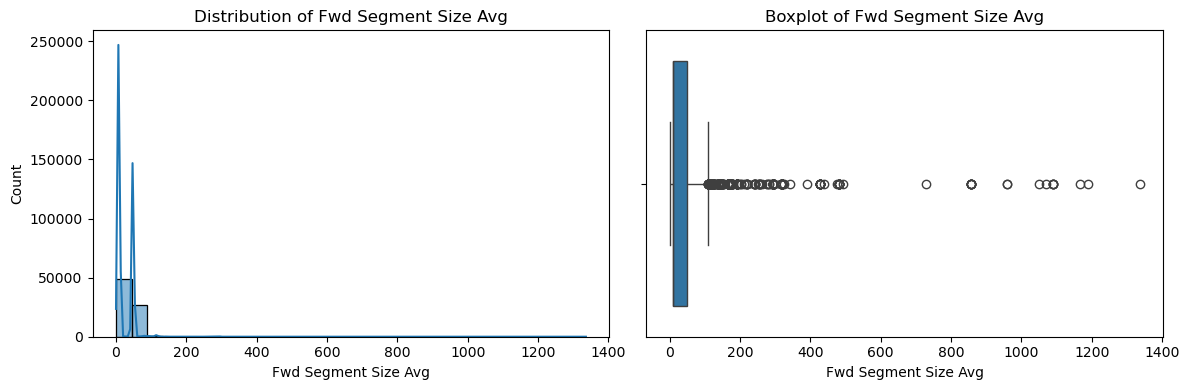

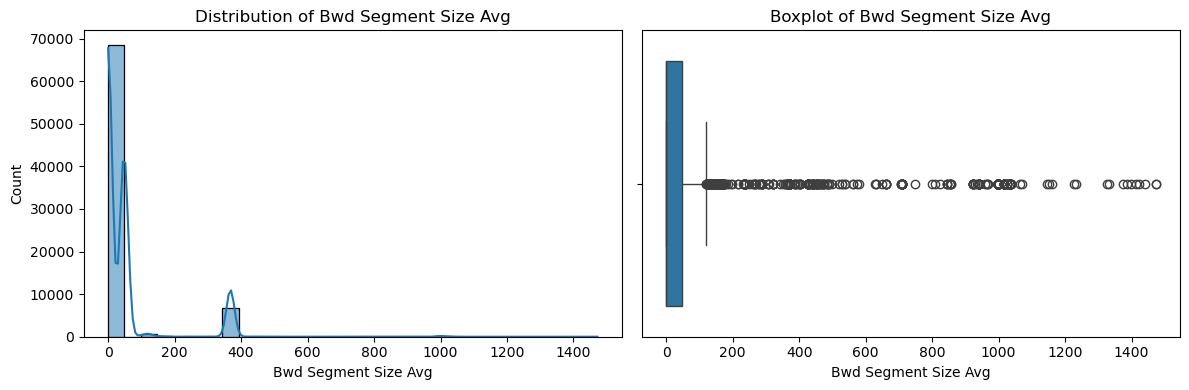

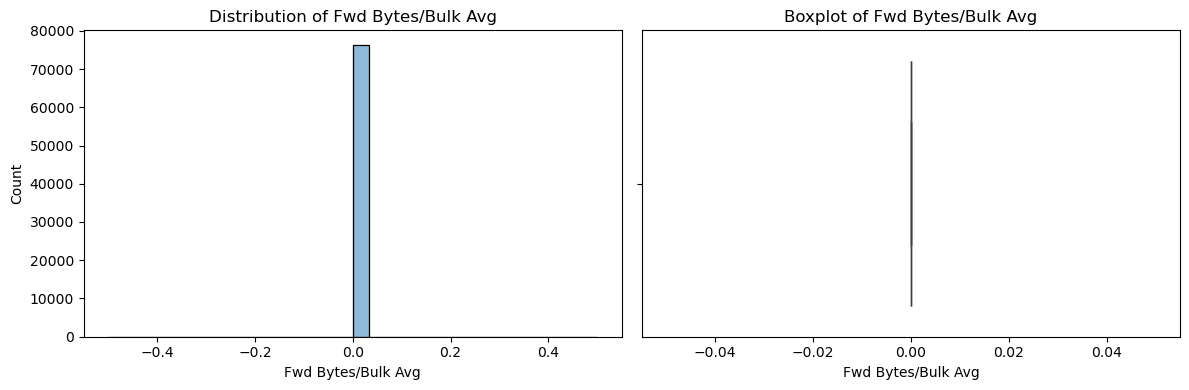

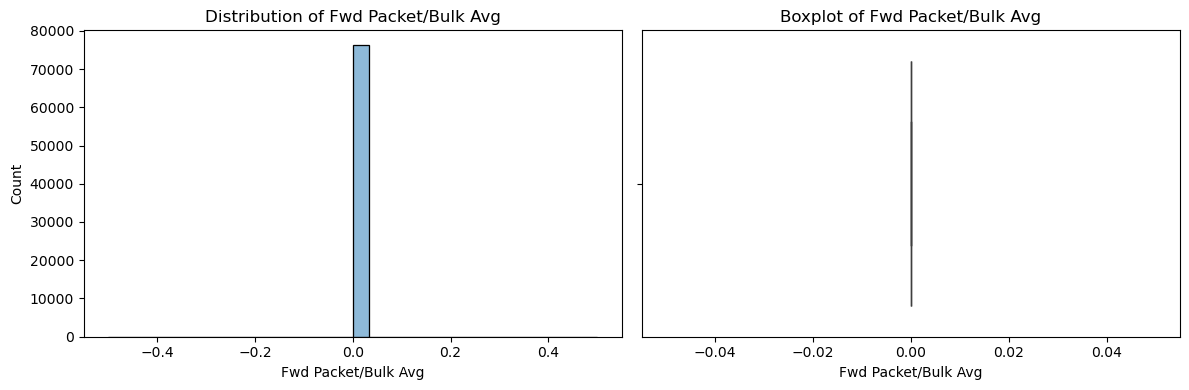

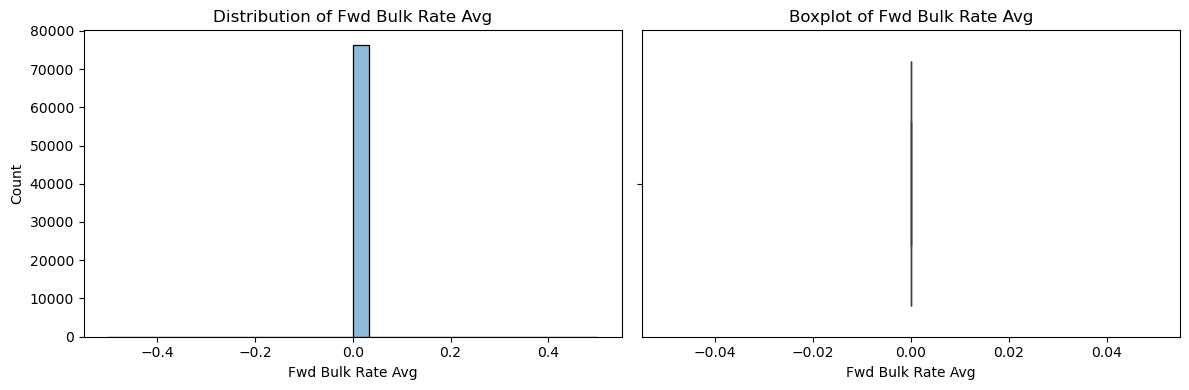

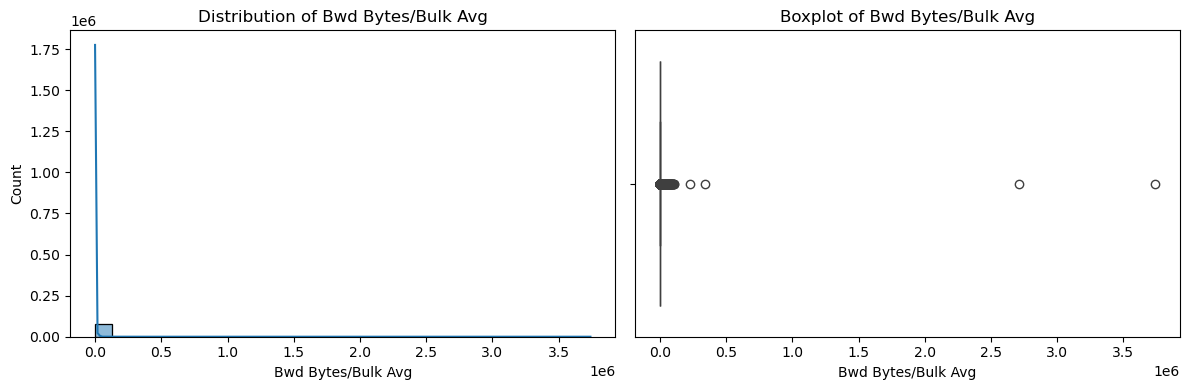

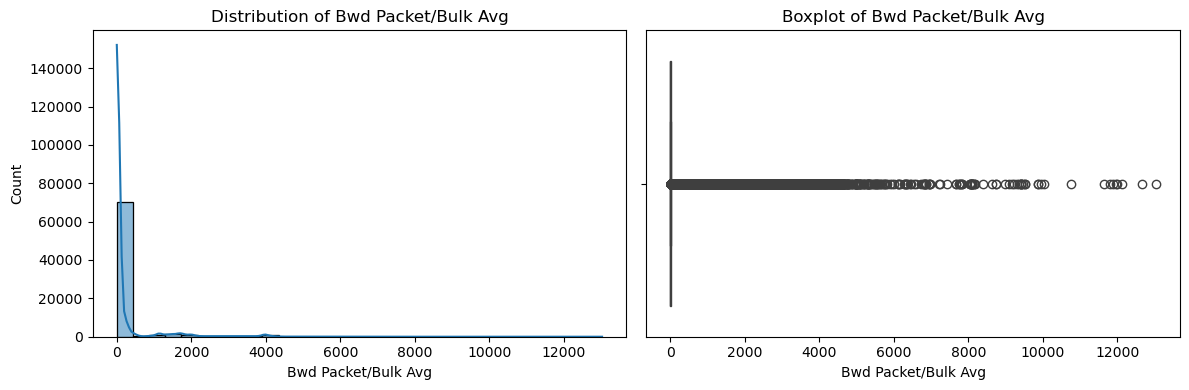

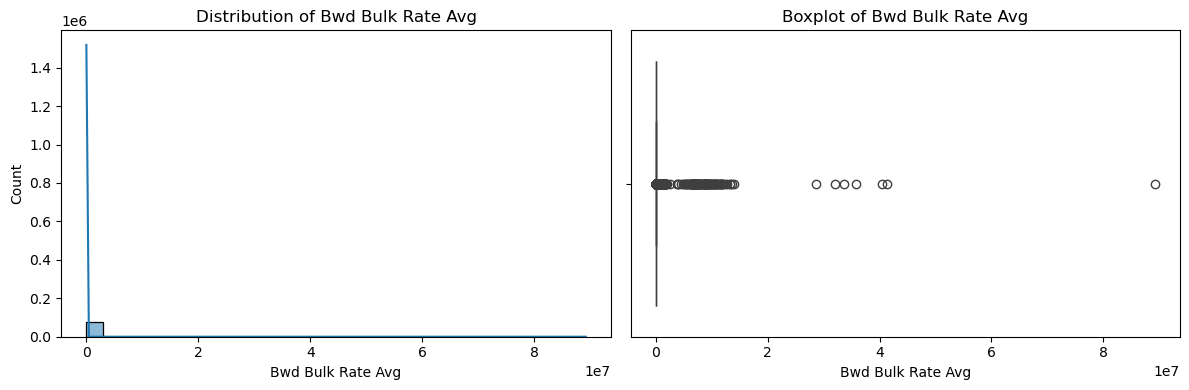

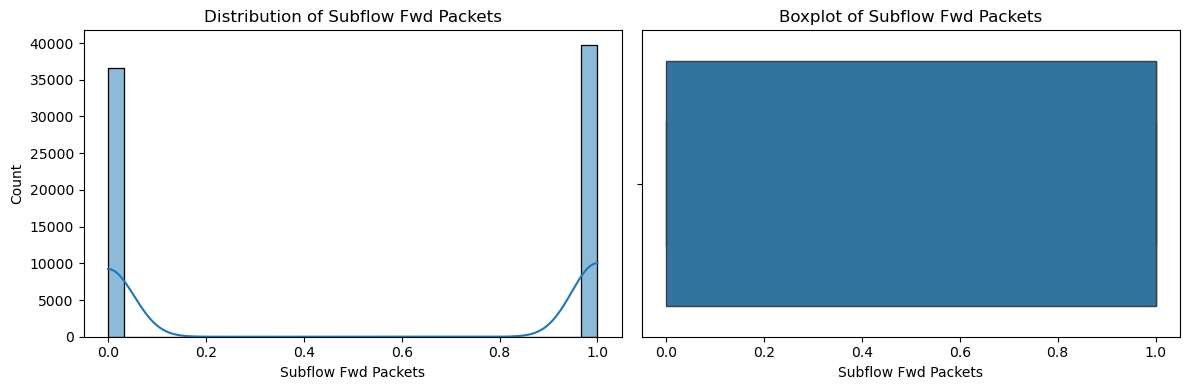

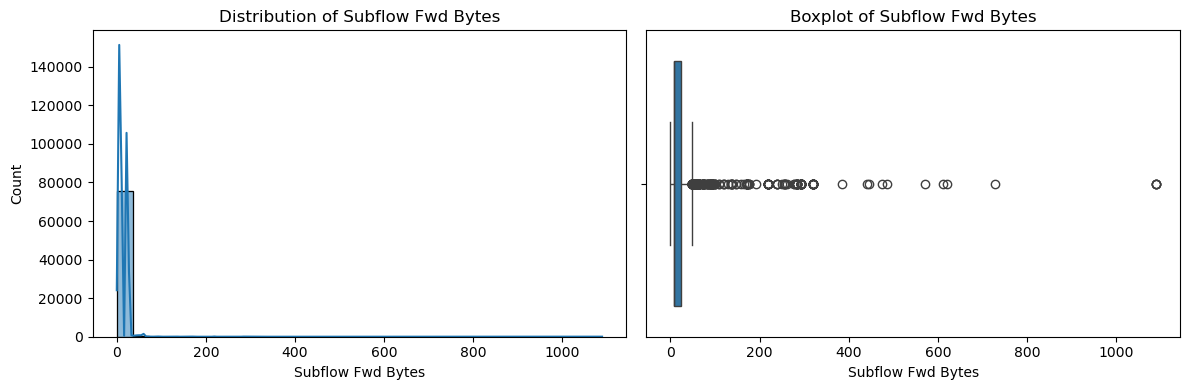

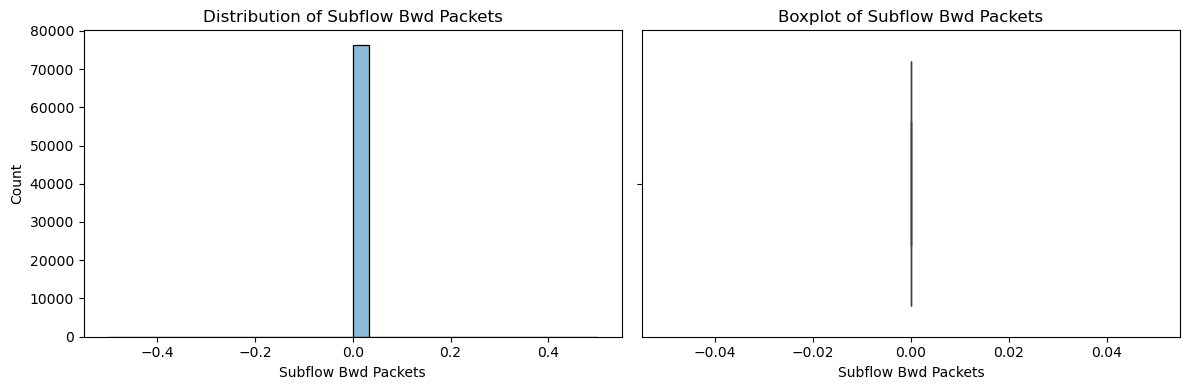

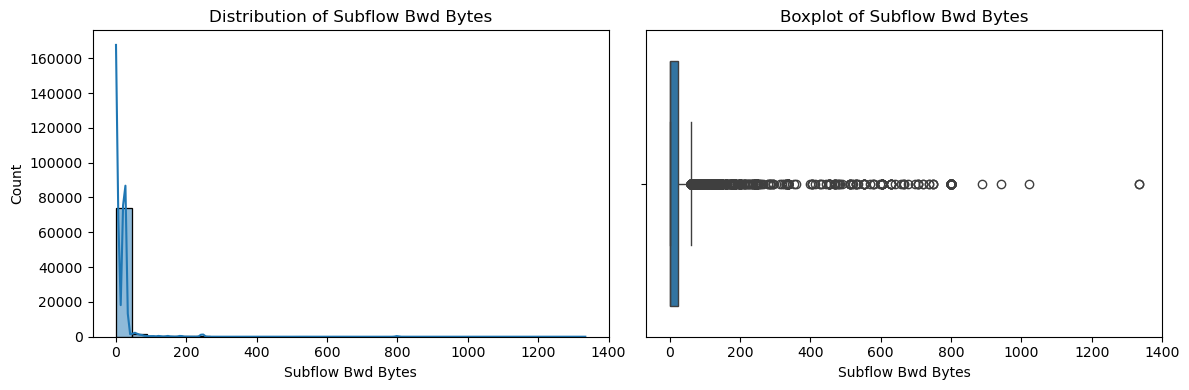

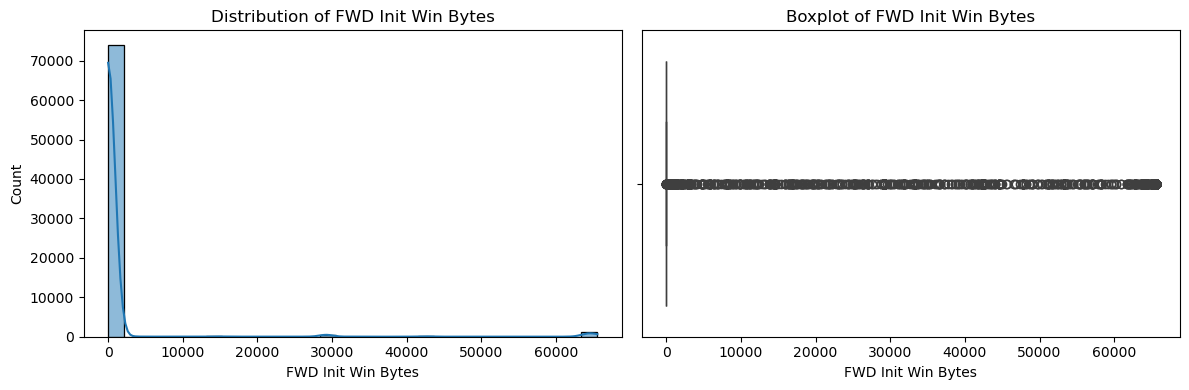

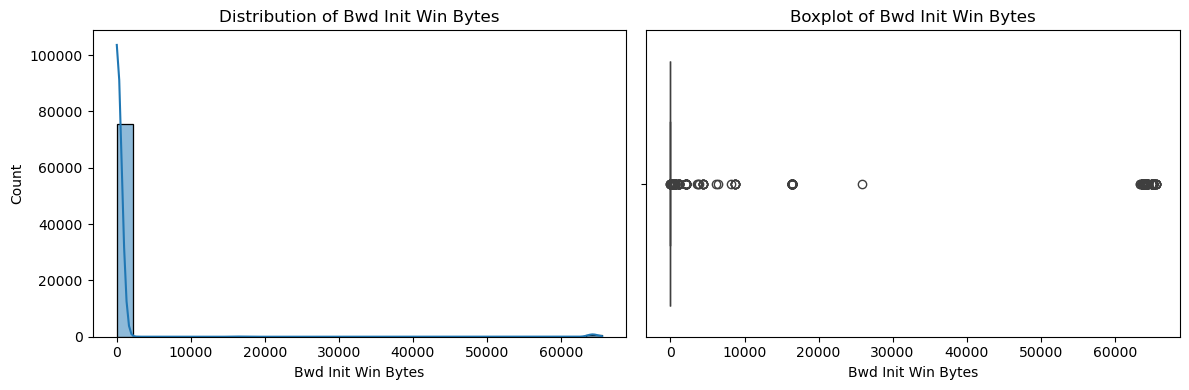

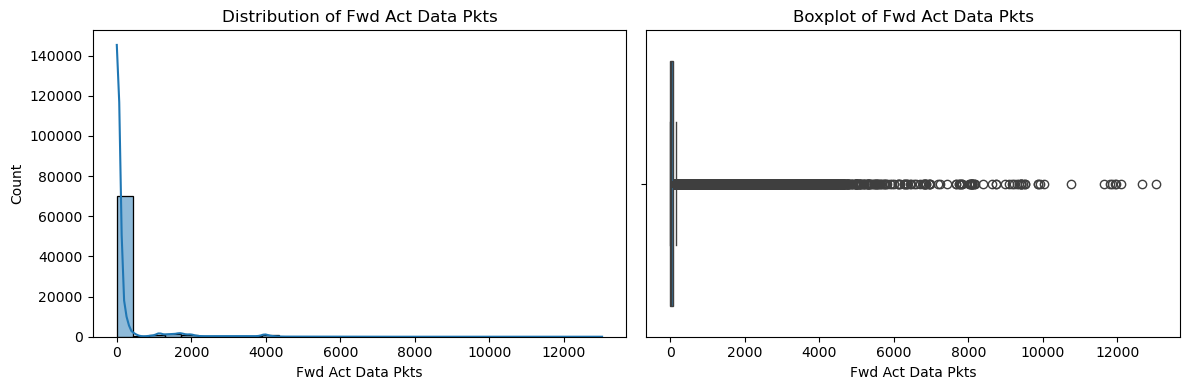

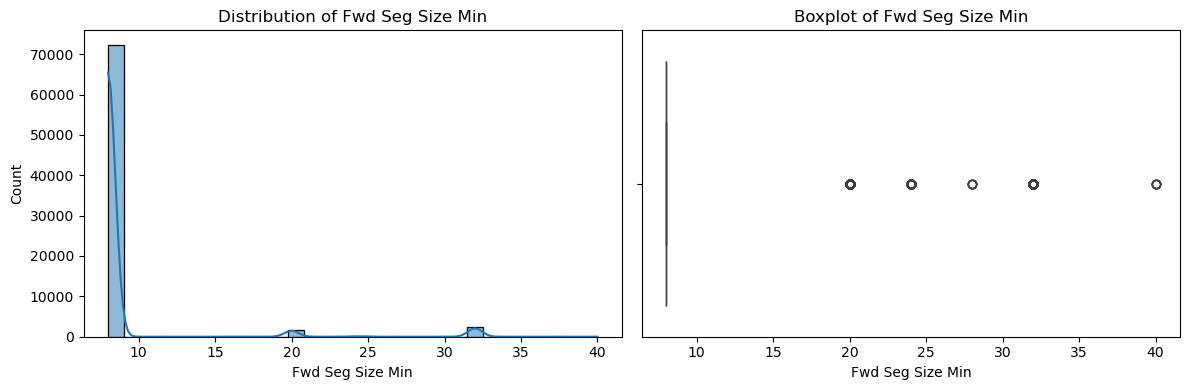

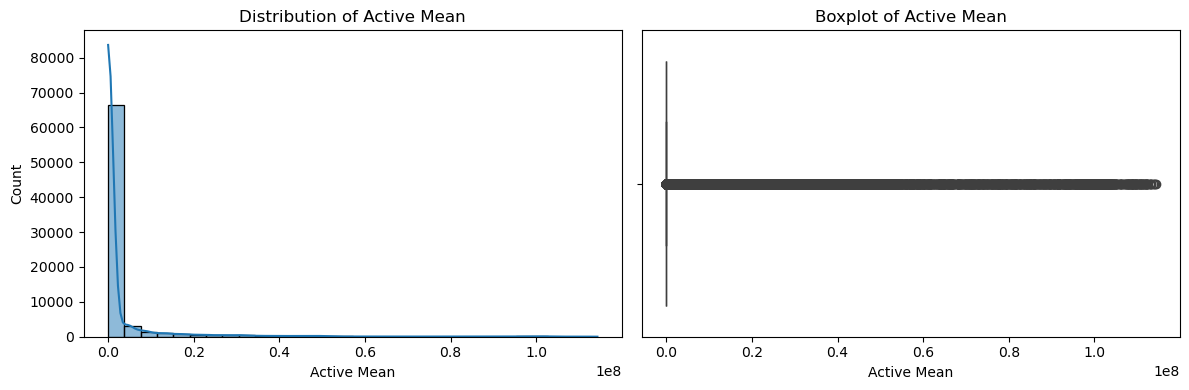

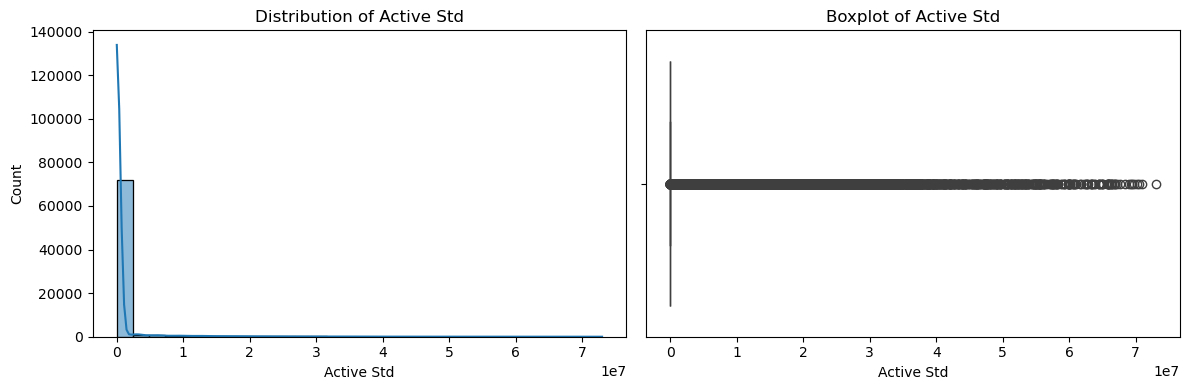

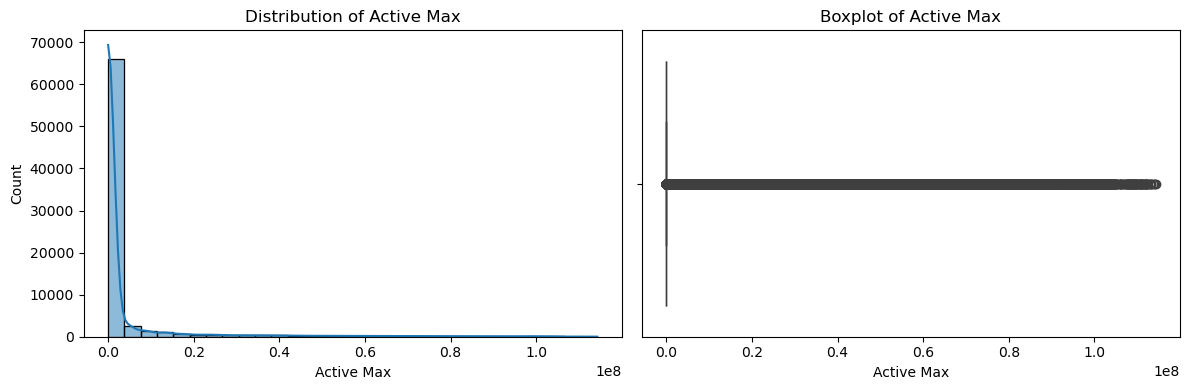

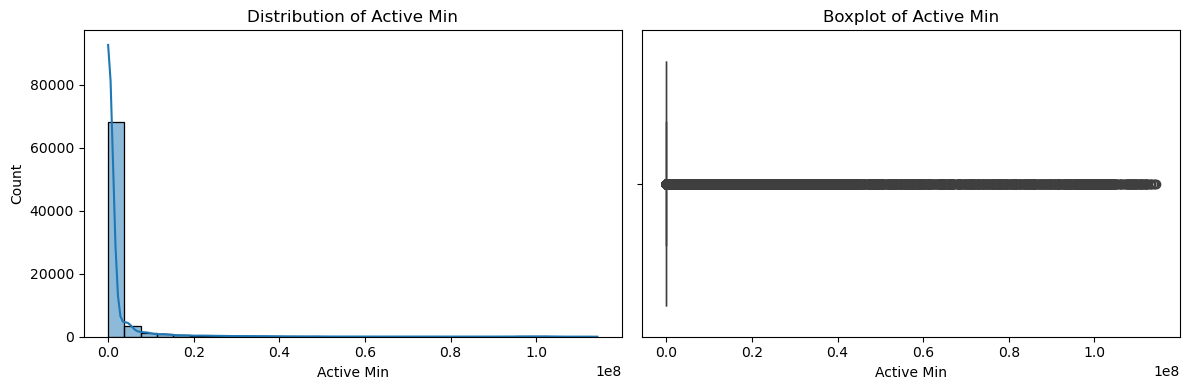

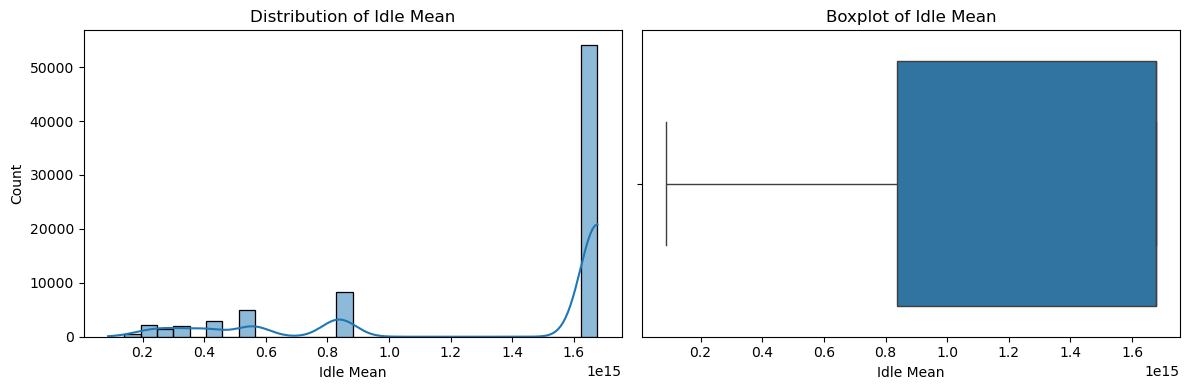

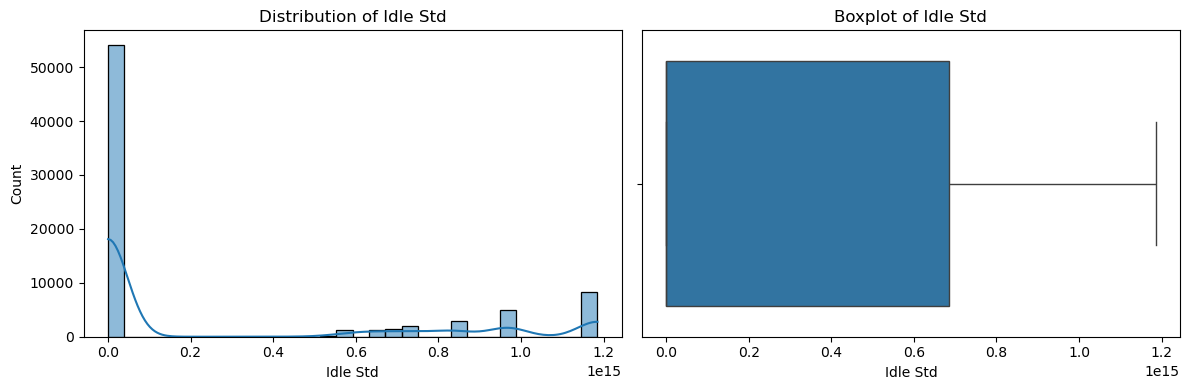

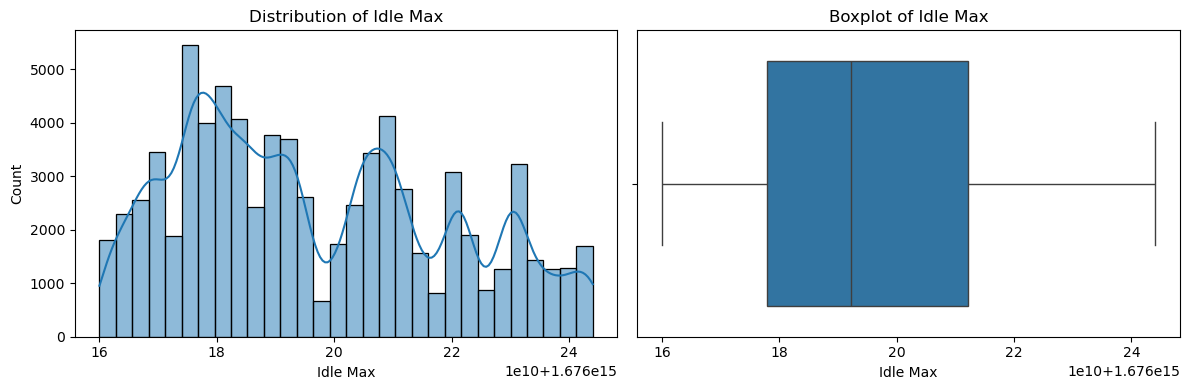

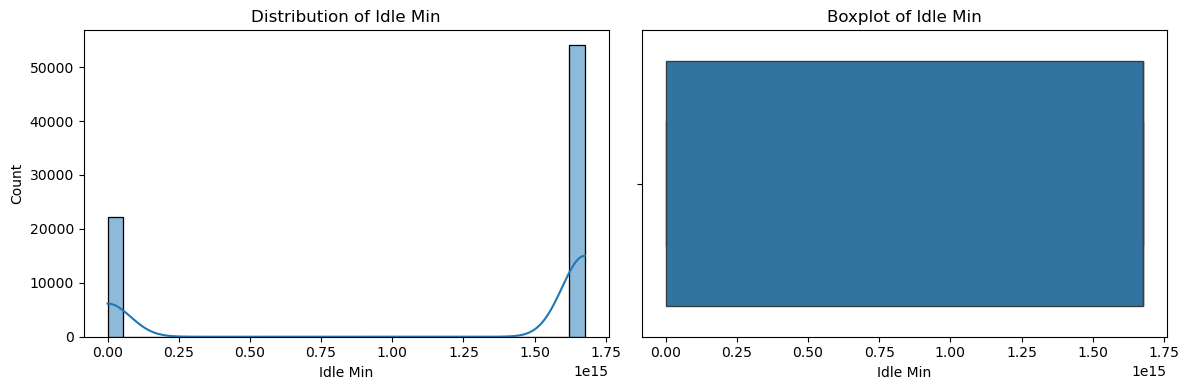

In [59]:
# Numerical columns only
num_cols = Feb12.select_dtypes(include='number').columns

# Hhistograms and Boxplots for each column
for col in num_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(Feb12[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Feb12[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

- #### This code looks at every number column in the dataset and shows two things: a histogram to see how the data is spread out, and a boxplot to spot outliers. It helps us understand each column better so we can decide if we should keep it, drop it, or clean it up. Further analysis needed. 